<a href="https://colab.research.google.com/github/dansarmiento/machine_learning_notebooks/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement :

With a plethora of medical data available and the rise of Data Science, a host of startups are taking up the challenge of attempting to create indicators for the forseen diseases that might be contracted! Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by CVDs. People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help. In this way, we try to solve automate another problem that occurs in the nature with a view to counter it and focus on to the next problem with the help of AI techniques!

Aim :

To classify / predict whether a patient is prone to heart failure depending on multiple attributes.

It is a binary classification with multiple numerical and categorical features.

Dataset Attributes

Age : age of the patient [years]

Sex : sex of the patient [M: Male, F: Female]

ChestPainType : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP : resting blood pressure [mm Hg]

Cholesterol : serum cholesterol [mm/dl]

FastingBS : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR : maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina : exercise-induced angina [Y: Yes, N: No]

Oldpeak : oldpeak = ST [Numeric value measured in depression]

ST_Slope : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease : output class [1: heart disease, 0: Normal]

Notebook Contents :
- Dataset Information
- Exploratory Data Analysis
- Modeling
- Conclusion

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [13]:
# import the data
import re

url = 'https://docs.google.com/spreadsheets/d/1FGw15UbWAsbEF4e0puSl9MIGlkhHUOBNuO7aLt5soxM/edit?usp=sharing'

# Extract sheet_id using regex
match = re.search(r'/d/([a-zA-Z0-9-_]+)', url)
sheet_id = match.group(1) if match else None

sheet_name = 'sheet1'
gsheet_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
data = pd.read_csv(gsheet_url)
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N     0.00       Up             0  
1              N     1.00     Flat             1  
2              N     0.00       Up             0  
3              Y     1.50     Flat             1  
4              N     0.00       Up             0

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


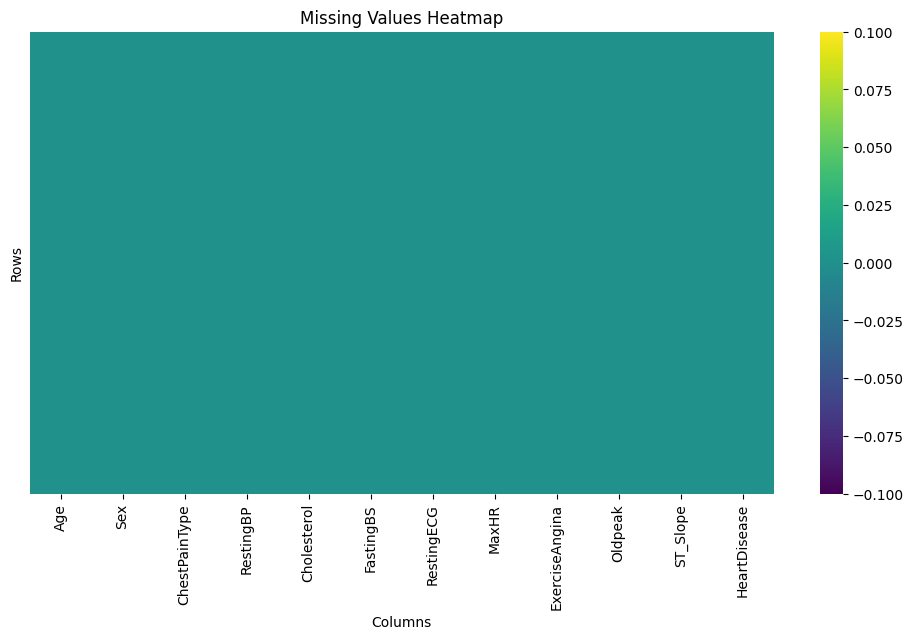

In [15]:
# visually looking for nulls and find none
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(),
            cmap='viridis',
            cbar=True,
            yticklabels=False)
plt.title("Missing Values Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

In [16]:
data.describe()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease
count 918.00     918.00       918.00     918.00 918.00   918.00        918.00
mean   53.51     132.40       198.80       0.23 136.81     0.89          0.55
std     9.43      18.51       109.38       0.42  25.46     1.07          0.50
min    28.00       0.00         0.00       0.00  60.00    -2.60          0.00
25%    47.00     120.00       173.25       0.00 120.00     0.00          0.00
50%    54.00     130.00       223.00       0.00 138.00     0.60          1.00
75%    60.00     140.00       267.00       0.00 156.00     1.50          1.00
max    77.00     200.00       603.00       1.00 202.00     6.20          1.00

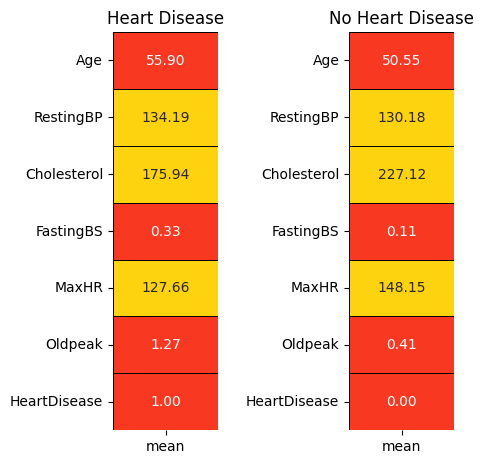

In [17]:
# Averages for all the features for cases of heart disease
yes = data[data['HeartDisease'] == 1].describe().T
no = data[data['HeartDisease'] == 0].describe().T
colors = ['#F93822','#FDD20E']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

In [18]:
# separate the catgorical and numerical features

# 1. Identify features that are text-based (object dtype)
object_features = data.select_dtypes(include='object').columns.tolist()

# 2. Identify numerical features
initial_numerical_features = data.select_dtypes(exclude='object').columns.tolist()

# 3. Find numerical features that are actually binary (contain only 1s and 0s)
binary_as_categorical = []
for col in initial_numerical_features:
    # Check if the unique non-null values are a subset of {0, 1}
    unique_values = set(data[col].dropna().unique())
    if unique_values.issubset({0, 1}):
        binary_as_categorical.append(col)

# 4. Create the final lists of categorical and numerical features
categorical_features = object_features + binary_as_categorical
numerical_features = [col for col in initial_numerical_features if col not in binary_as_categorical]

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType RestingECG ExerciseAngina ST_Slope FastingBS HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


- Creating a deep copy of the orginal dataset and label encoding the text data of the categorical features.
- Modifications in the original dataset will not be highlighted in this deep copy.
- Hence, we use this deep copy of dataset that has all the features converted into numerical values for visualization & modeling purposes.

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = data.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

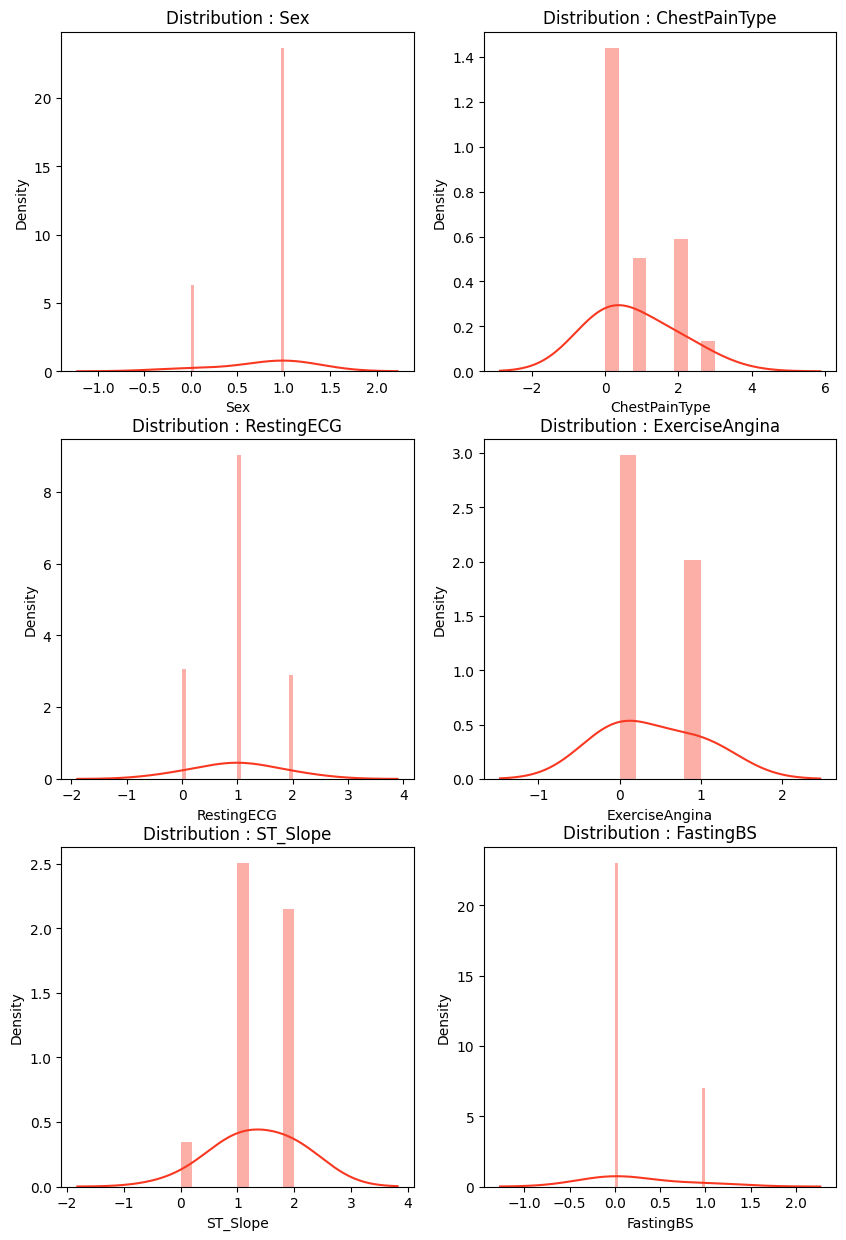

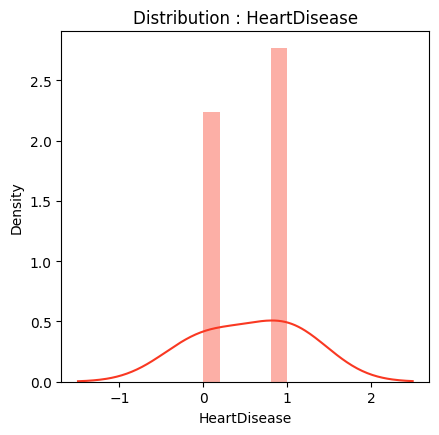

In [20]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features) - 1):

    plt.subplot(3,2,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[categorical_features[len(categorical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + categorical_features[len(categorical_features) - 1]
plt.title(title);

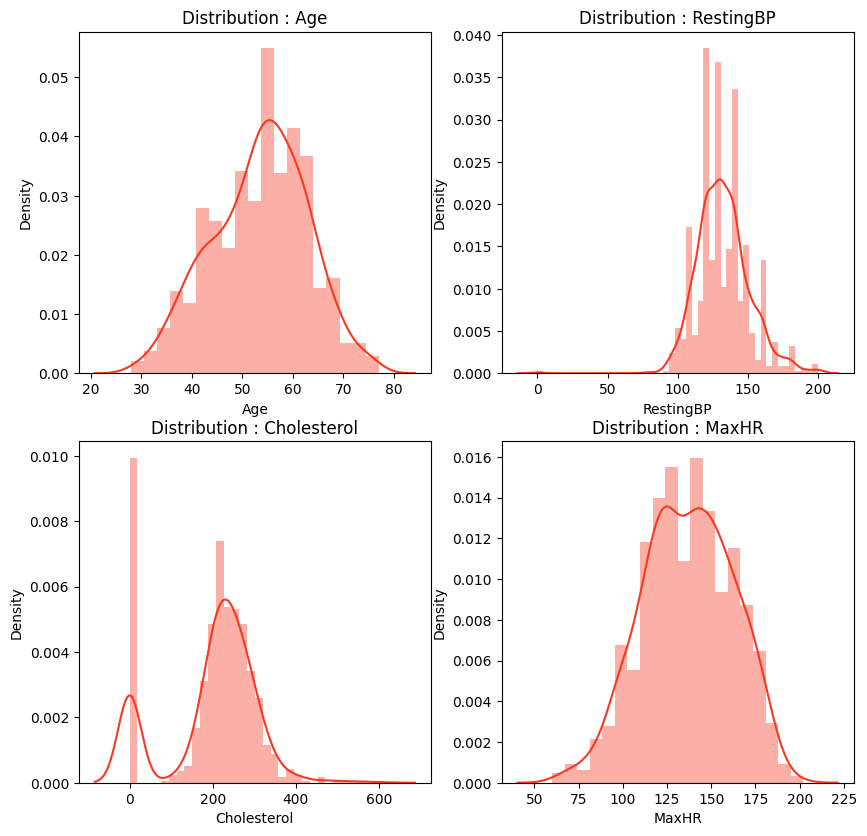

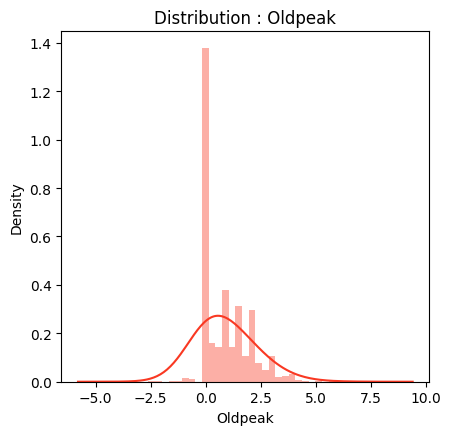

In [21]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

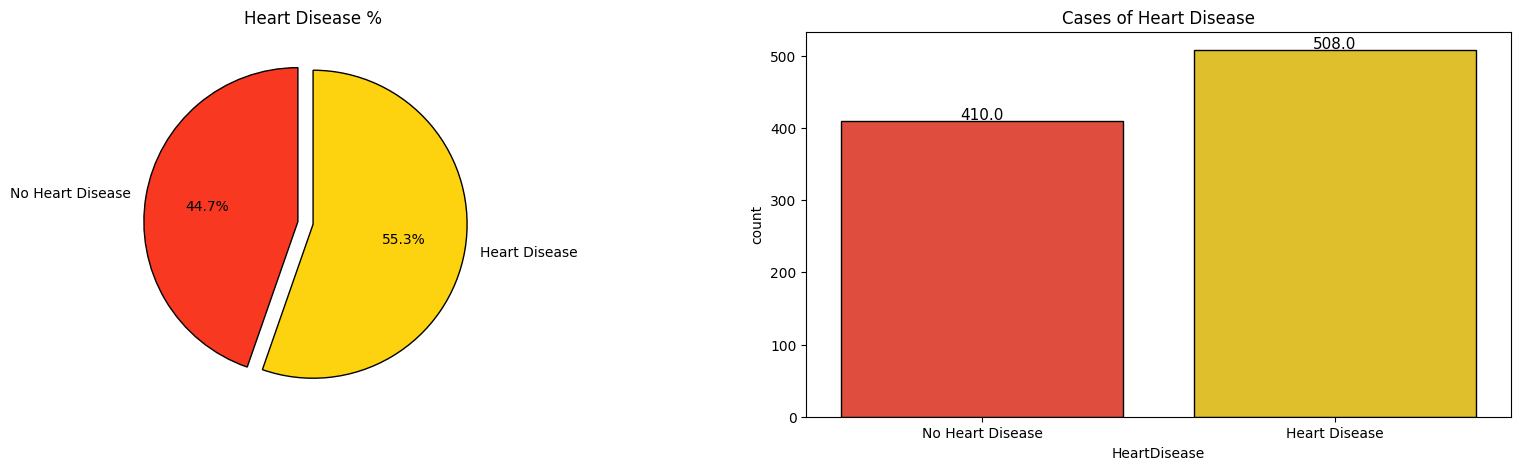

In [24]:
l = list(data['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100,l[0] / sum(l) * 100]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Heart Disease','Heart Disease'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Heart Disease %');

plt.subplot(1,2,2)
ax = sns.countplot(x='HeartDisease', data=data, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2,
            rect.get_height(),
            horizontalalignment='center',
            fontsize=11)
ax.set_xticklabels(['No Heart Disease','Heart Disease'])
plt.title('Cases of Heart Disease');
plt.show()

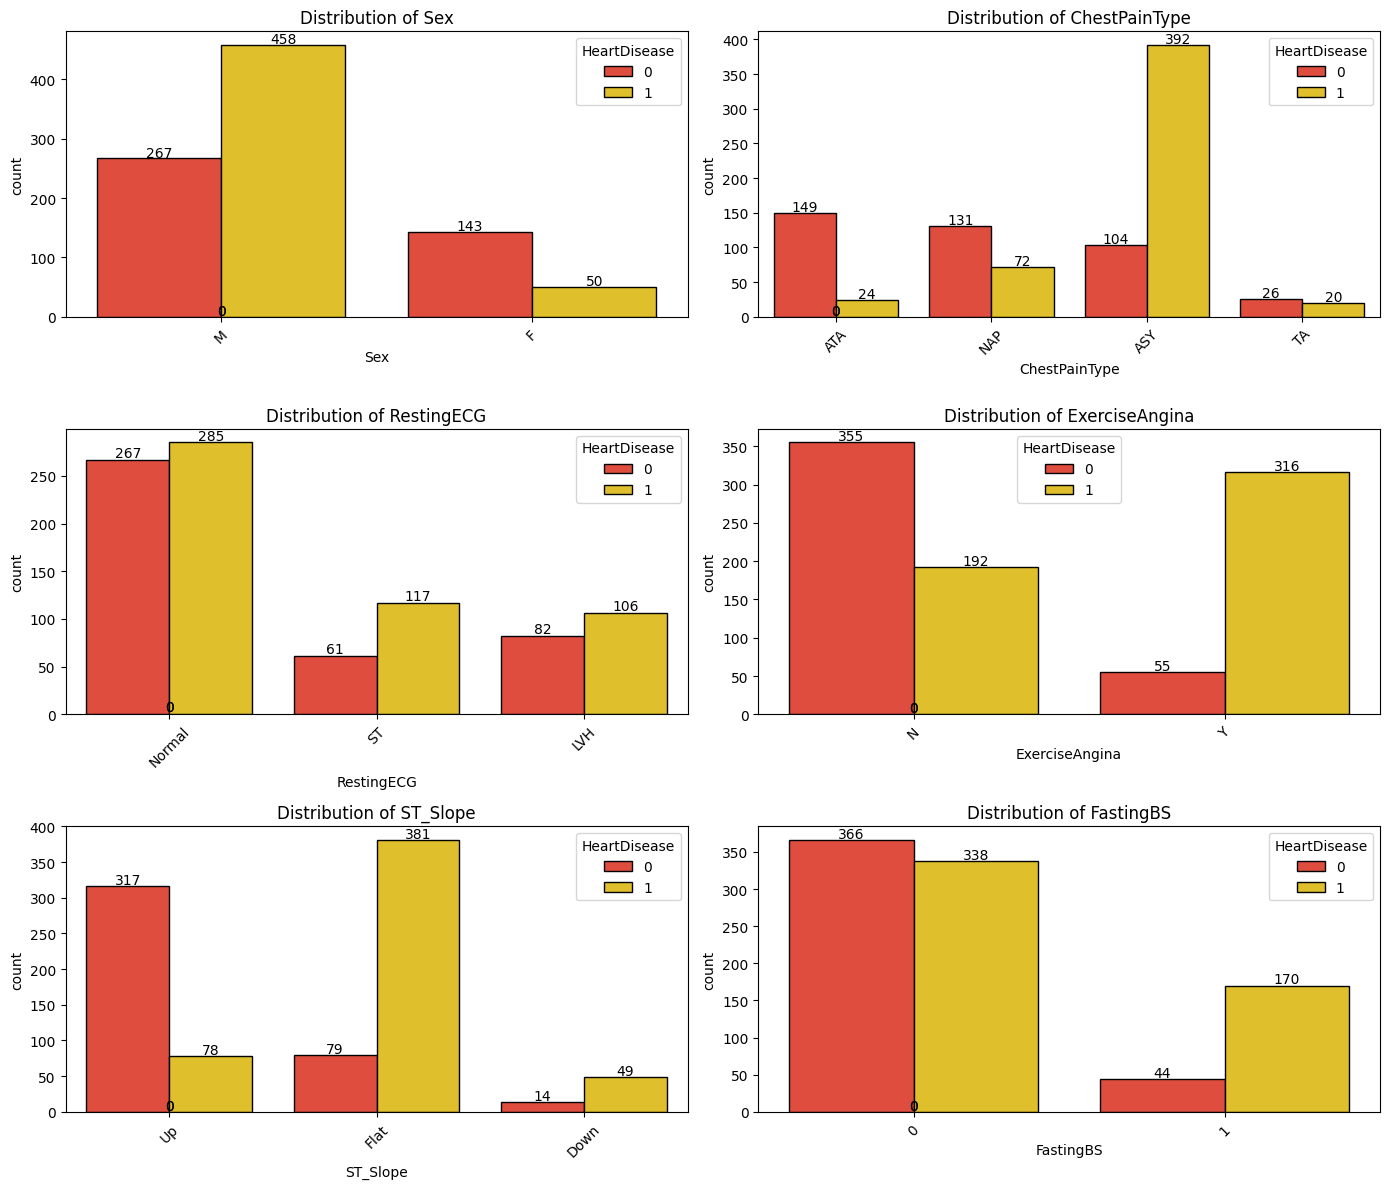

In [27]:
num_plots = len(categorical_features) - 1
cols = 2
rows = (num_plots + 1) // cols

plt.figure(figsize=(14, rows * 4))  # Adjust figure size based on number of rows

for i in range(num_plots):
    plt.subplot(rows, cols, i + 1)
    ax = sns.countplot(x=categorical_features[i],
                       data=data,
                       hue="HeartDisease",
                       palette=colors,
                       edgecolor='black')

    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2,
                rect.get_height() + 3,
                int(rect.get_height()),
                ha='center', fontsize=10)

    plt.title(f"Distribution of {categorical_features[i]}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

- Male population has more heart disease patients than no heart disease patients. In the case of Female population, heart disease patients are less than no heart disease patients.
- ASY type of chest pain boldly points towards major chances of heart disease.
- Fasting Blood Sugar is tricky! Patients diagnosed with Fasting Blood Sugar and no Fasting Blood Sugar have significant heart disease patients.
- RestingECG does not present with a clear cut category that highlights heart disease patients. All the 3 values consist of high number of heart disease patients.
- Exercise Induced Engina definitely bumps the probability of being diagnosed with heart diseases.
- With the ST_Slope values, flat slope displays a very high probability of being diagnosed with heart disease. Down also shows the same output but in very few data points.

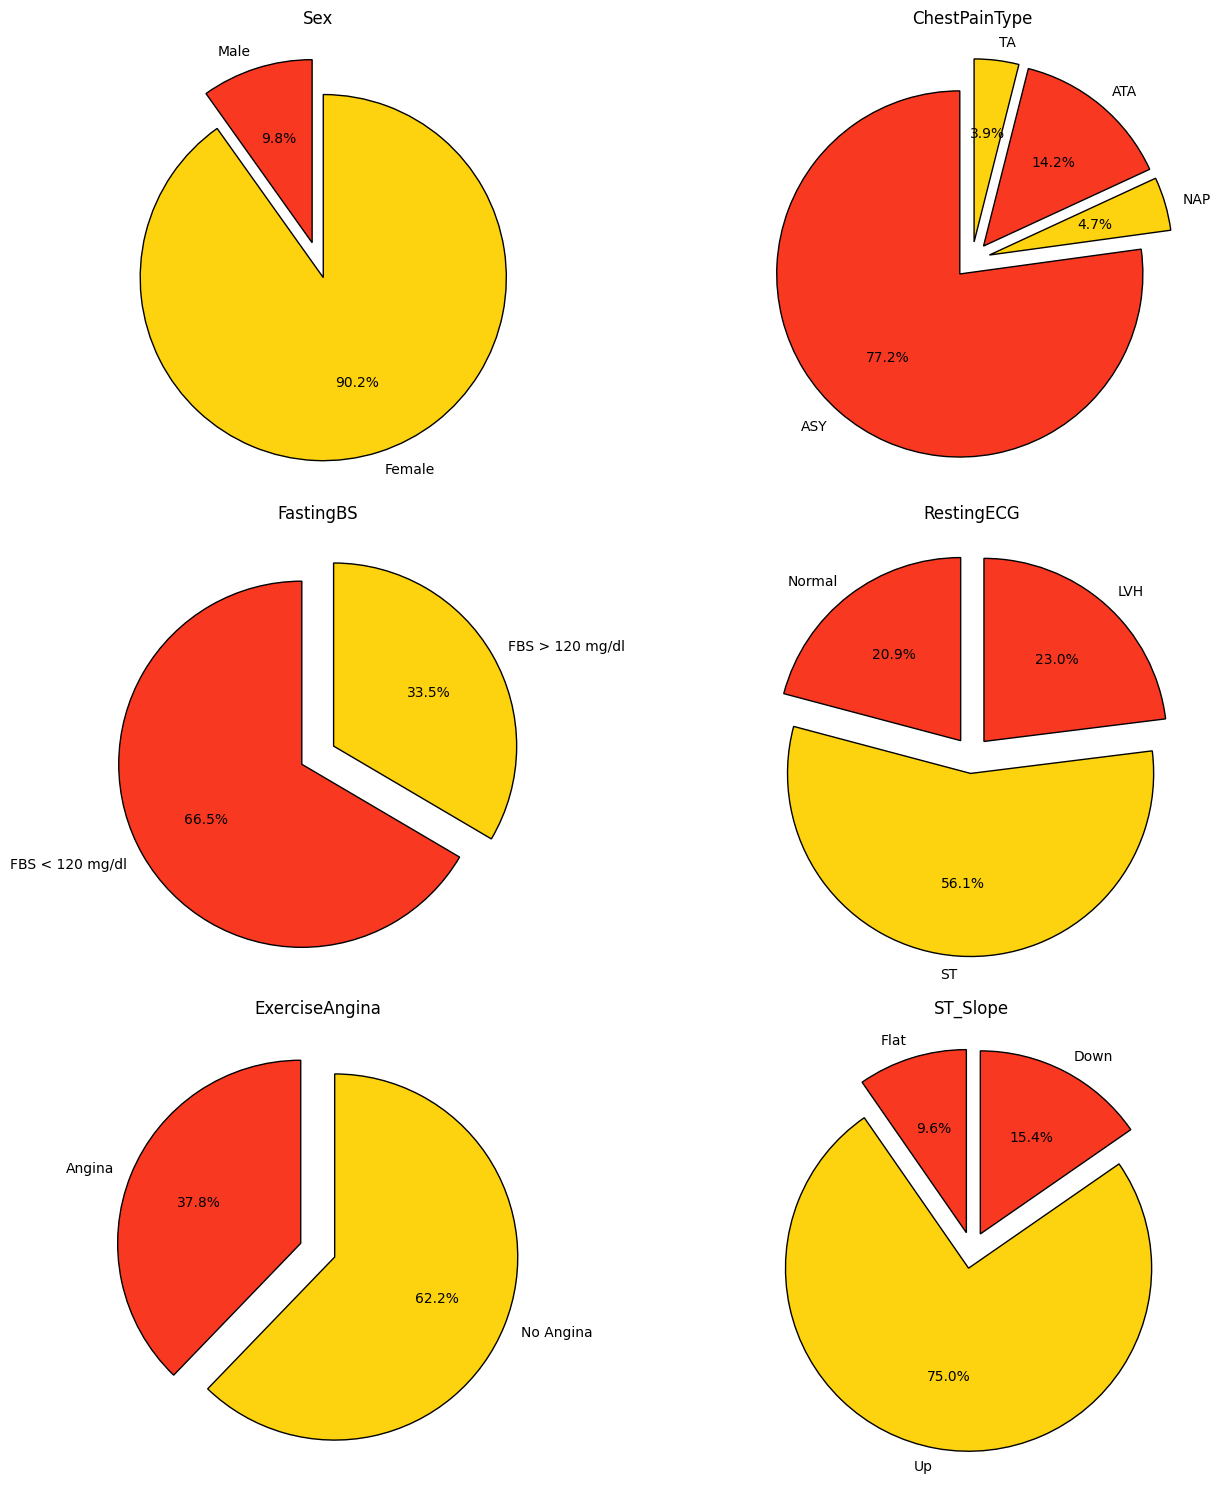

In [30]:

features = {
    'Sex': ['Male', 'Female'],
    'ChestPainType': ['ASY', 'NAP', 'ATA', 'TA'],
    'FastingBS': ['FBS < 120 mg/dl', 'FBS > 120 mg/dl'],
    'RestingECG': ['Normal', 'ST', 'LVH'],
    'ExerciseAngina': ['Angina', 'No Angina'],
    'ST_Slope': ['Flat', 'Up', 'Down']
}

# Setup figure
n = len(features)
rows = (n + 1) // 2
plt.figure(figsize=(14, rows * 5))

# Loop through features and plot pies
for i, (feature, labels) in enumerate(features.items(), start=1):
    # Get value counts as percentages
    counts = data[data['HeartDisease'] == 1][feature].value_counts(normalize=True) * 100

    # Reorder according to label order if needed
    values = [counts.get(i, 0) for i in sorted(counts.index)]

    # Plot
    plt.subplot(rows, 2, i)
    plt.pie(values,
            labels=labels[:len(values)],
            autopct='%1.1f%%',
            startangle=90,
            explode=[0.1] + [0.1] * (len(values) - 1),
            colors=colors[:len(values)],
            wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
    plt.title(feature)

plt.tight_layout()
plt.show()


- Out of all the heart disease patients, a staggering 90% patients are male.
- When it comes to the type of chest pain, ASY type holds the majority with 77% that lead to heart diseases.
- Fasting Blood Sugar level < 120 mg/dl displays high chances of heart diseases.
- For RestingECG, Normal level accounts for 56% chances of heart diseases than LVH and ST levels.
- Detection of Exercise Induced Angina also points towards heart diseases.
- When it comes to ST_Slope readings, Flat level holds a massive chunk with 75% that may assist in detecting underlying heart problems.

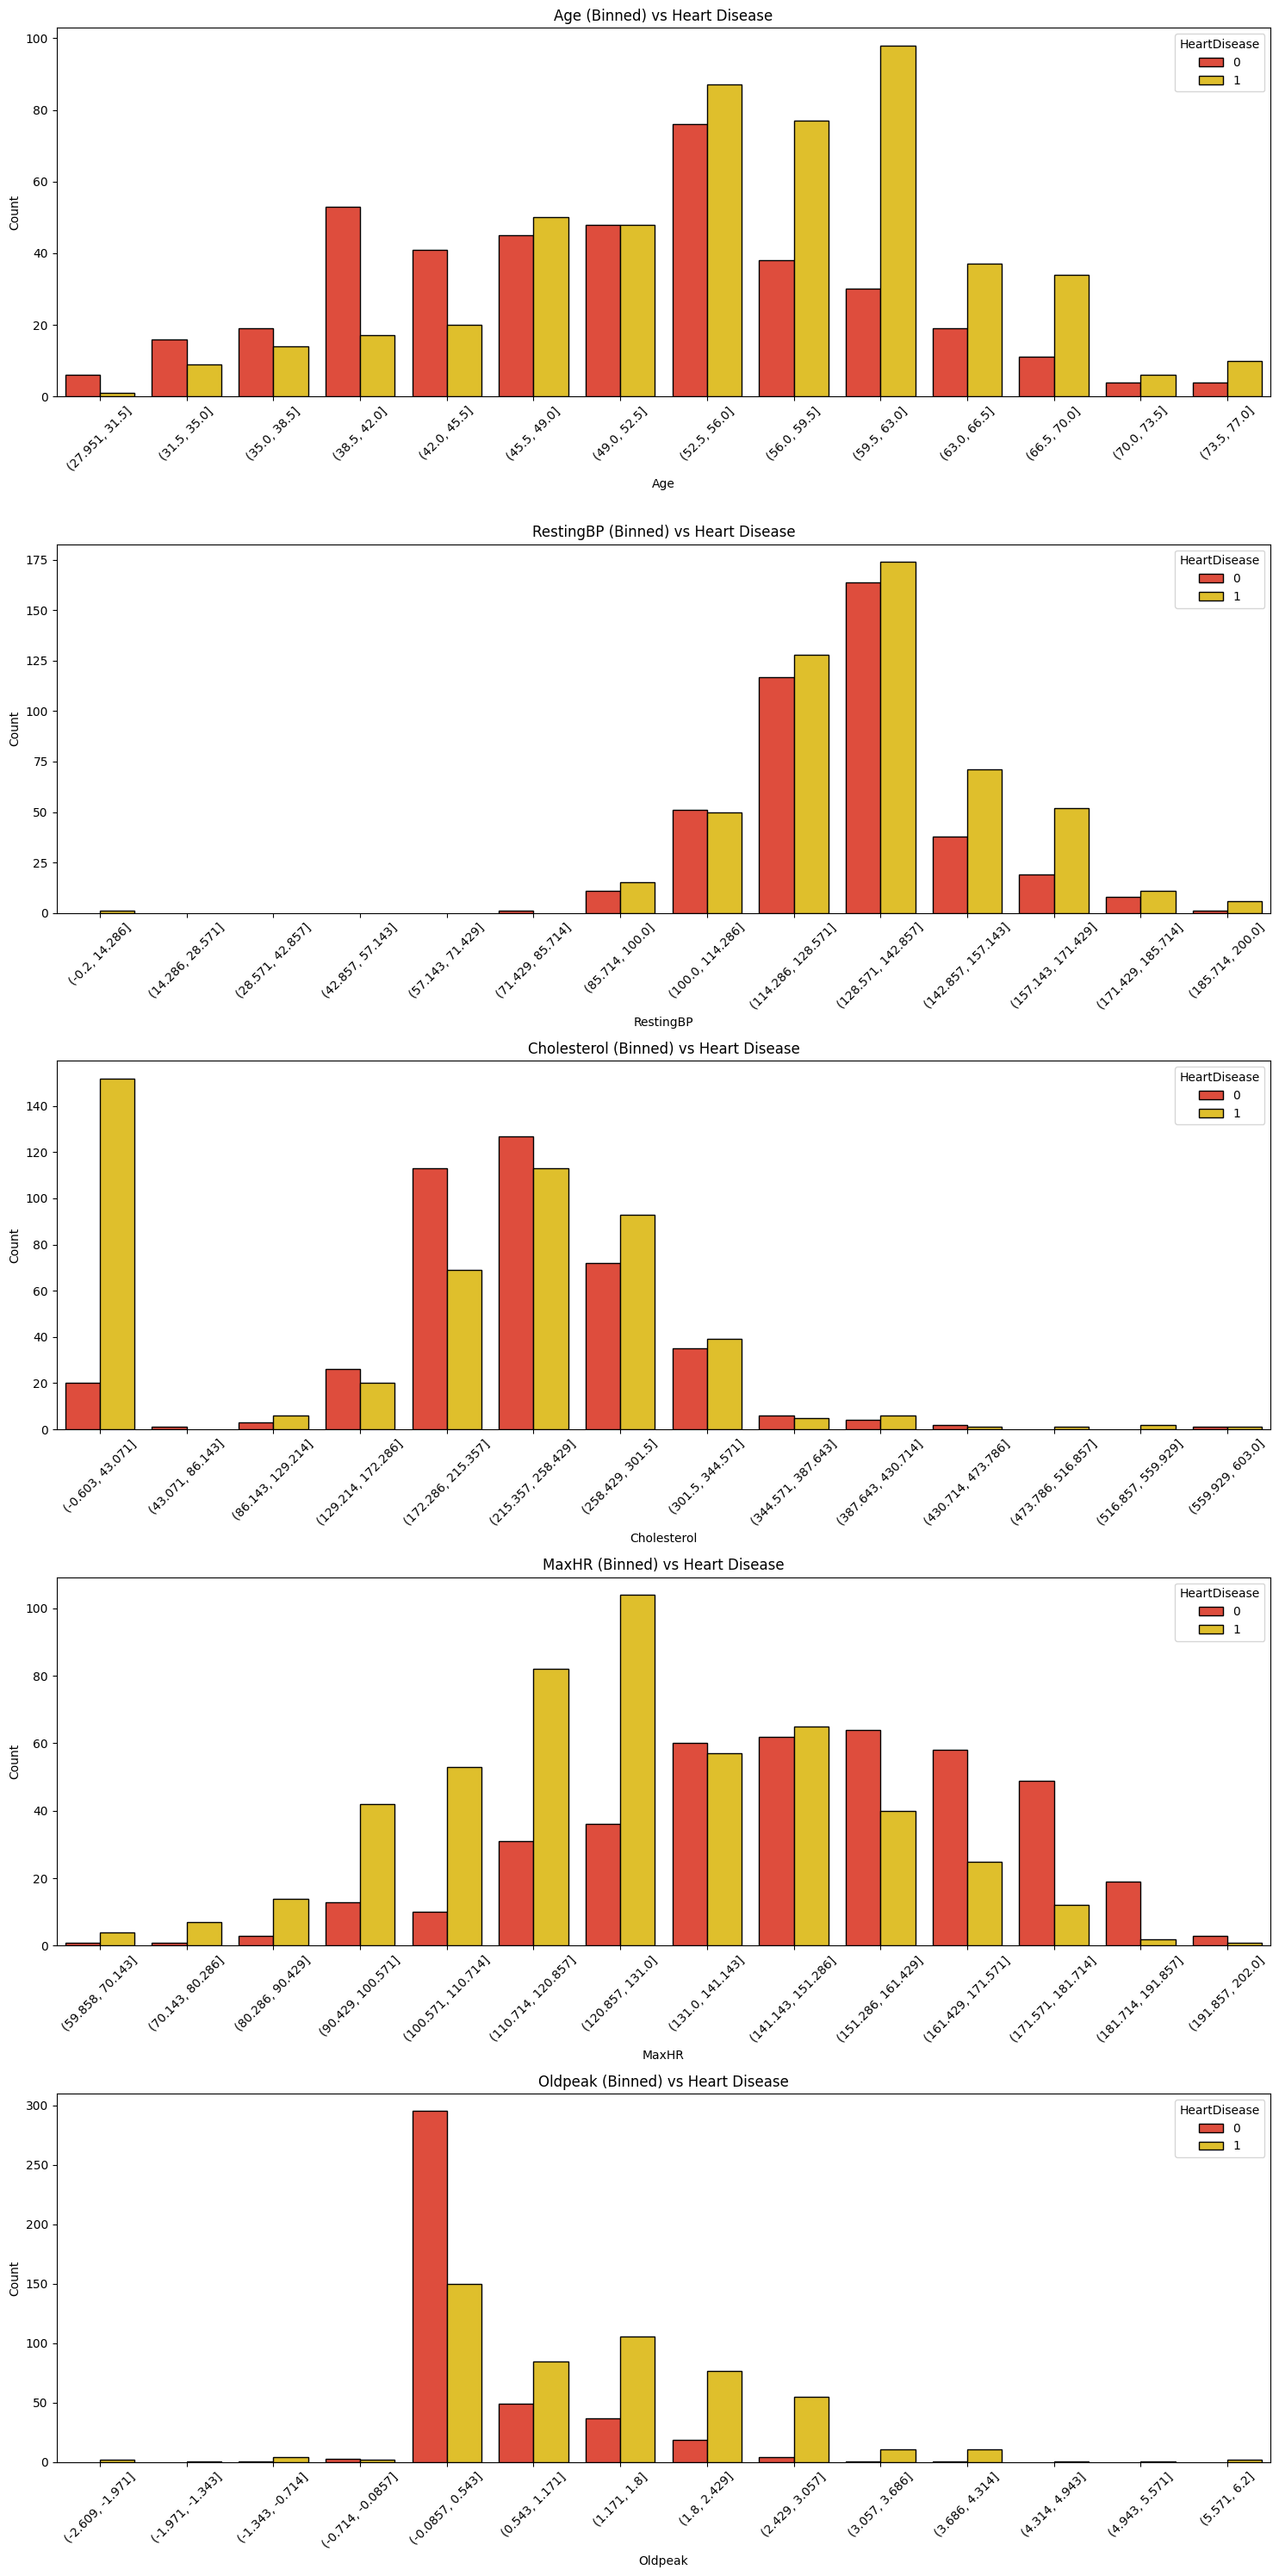

In [33]:
binned_data = data.copy()

# Bucket each numerical feature into 14 equal-width bins
for col in numerical_features:
    binned_data[col + "_binned"] = pd.cut(binned_data[col], bins=14)

# Plotting
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 30))

for i, col in enumerate(numerical_features):
    plt.subplot(5, 1, i + 1)
    sns.countplot(x=col + "_binned", data=binned_data, hue="HeartDisease", palette=colors, edgecolor='black')
    plt.title(f"{col} (Binned) vs Heart Disease")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

- From the RestingBP group data, 95 (19x5) - 170 (34x5) readings are most prone to be detected with heart diseases.
- Cholesterol levels between 160 (16x10) - 340 (34x10) are highly susceptible to heart diseases.
- For the MaxHR readings, heart diseases are found throughout the data but 70 (14x5) - 180 (36x5) values has detected many cases.
- Oldpeak values also display heart diseases throughout. 0 (0x5/10) - 4 (8x5/10) slope values display high probability to be diagnosed with heart diseases.

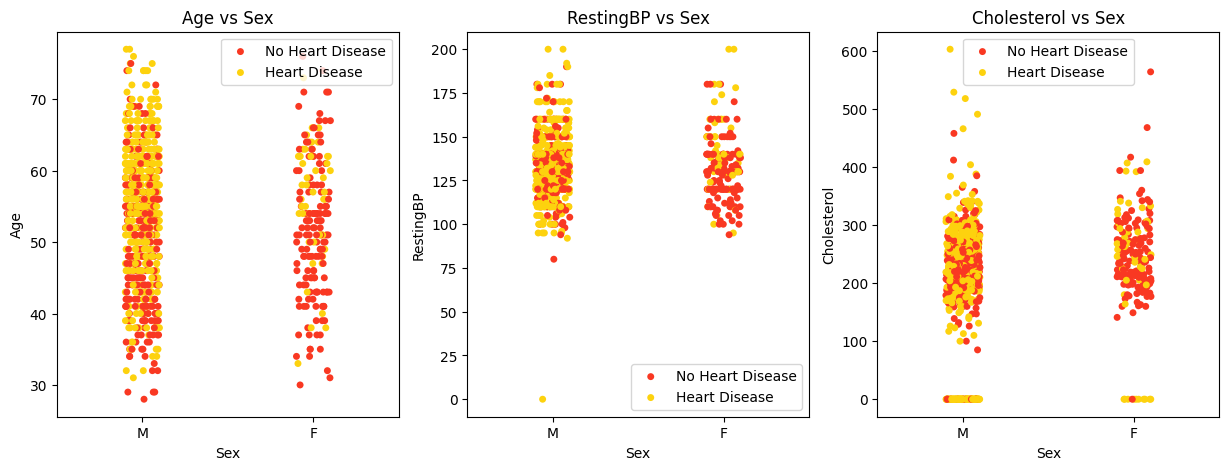

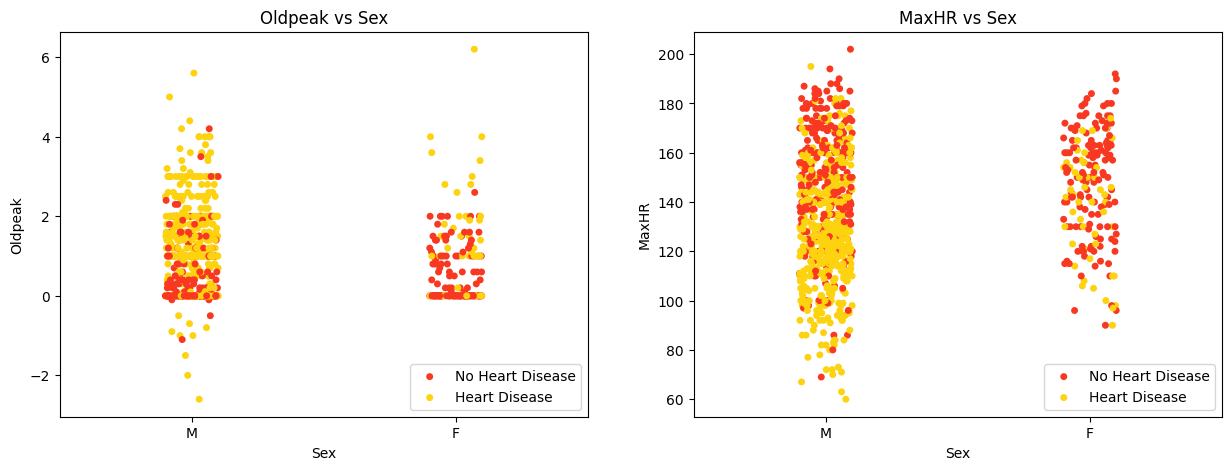

In [34]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex'
    plt.title(title);

- Male population displays heart diseases at near about all the values of the numerical features. Above the age of 50, positive old peak values and maximum heart rate below 140, heart diseases in male population become dense.
- Female population data points are very less as compared to male population data points. Hence, we cannot point to specific ranges or values that display cases of heart diseases.

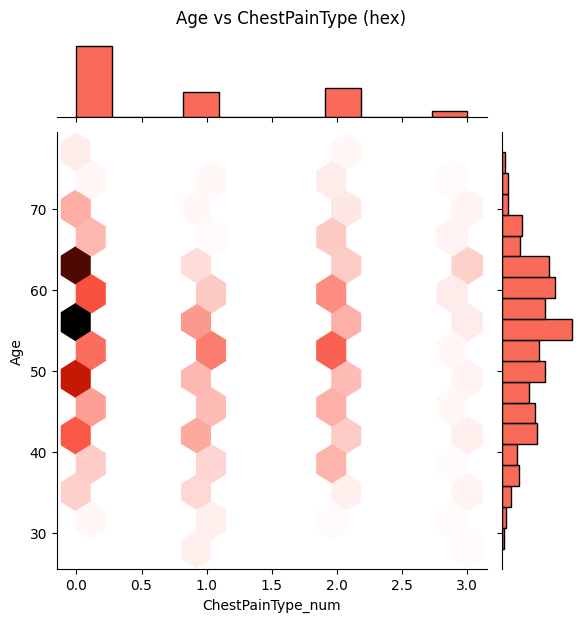

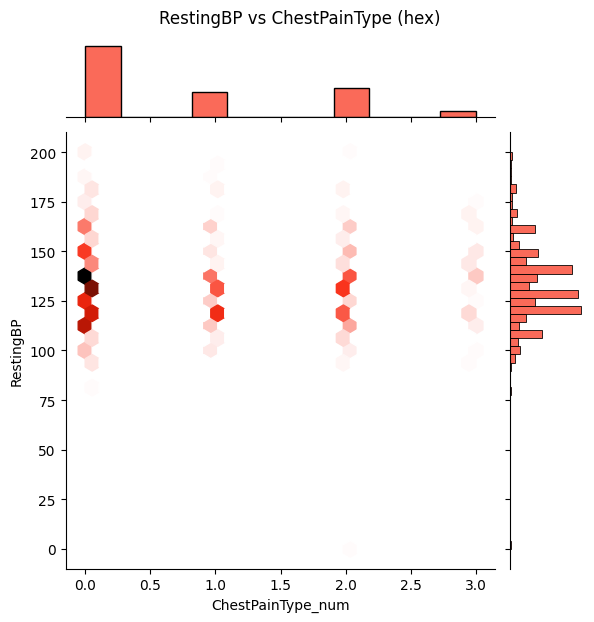

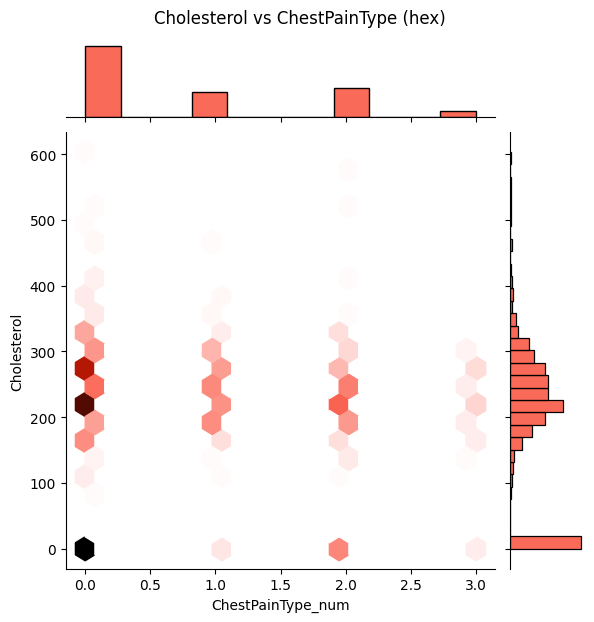

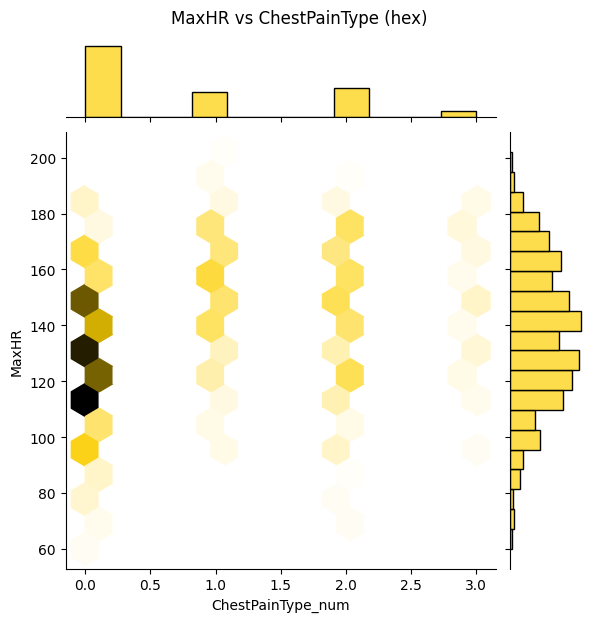

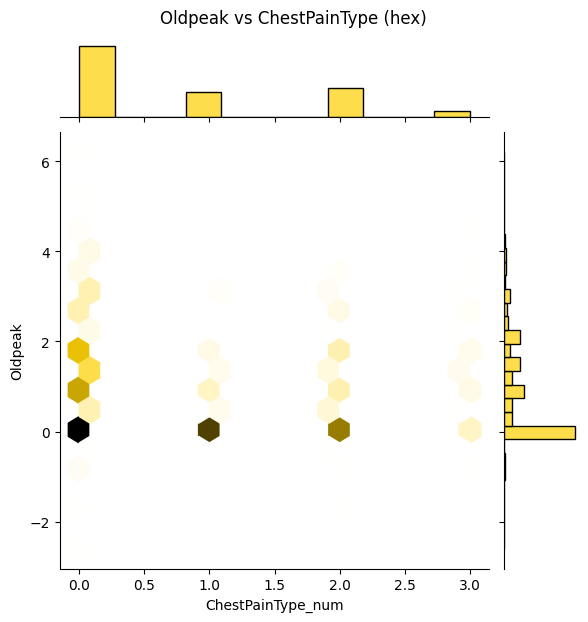

In [36]:
data_encoded = data.copy()
data_encoded['ChestPainType_num'] = data_encoded['ChestPainType'].astype('category').cat.codes


for i in range(3):
    sns.jointplot(
        x='ChestPainType_num',
        y=numerical_features[i],
        data=data_encoded,
        kind='hex',
        height=6,
        color=colors[0]
    ).fig.suptitle(f"{numerical_features[i]} vs ChestPainType (hex)", y=1.03)


for i in [-2, -1]:
    sns.jointplot(
        x='ChestPainType_num',
        y=numerical_features[i],
        data=data_encoded,
        kind='hex',
        height=6,
        color=colors[1]
    ).fig.suptitle(f"{numerical_features[i]} vs ChestPainType (hex)", y=1.03)


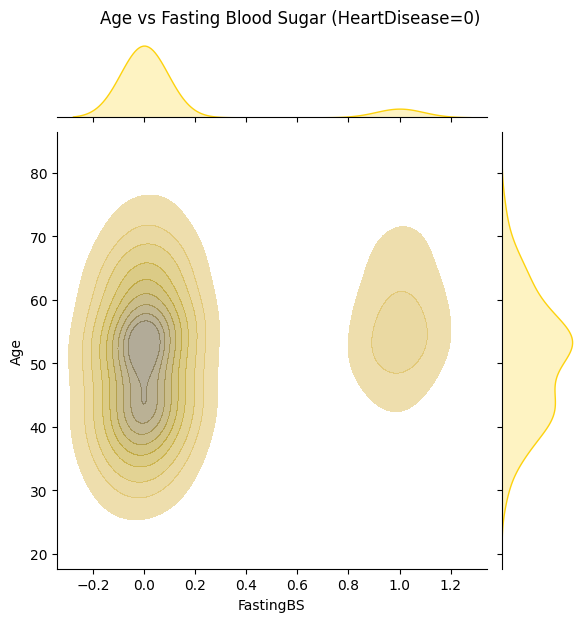

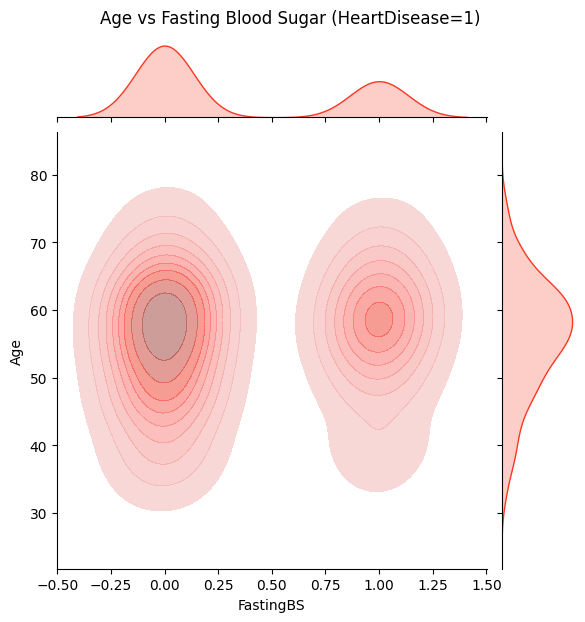

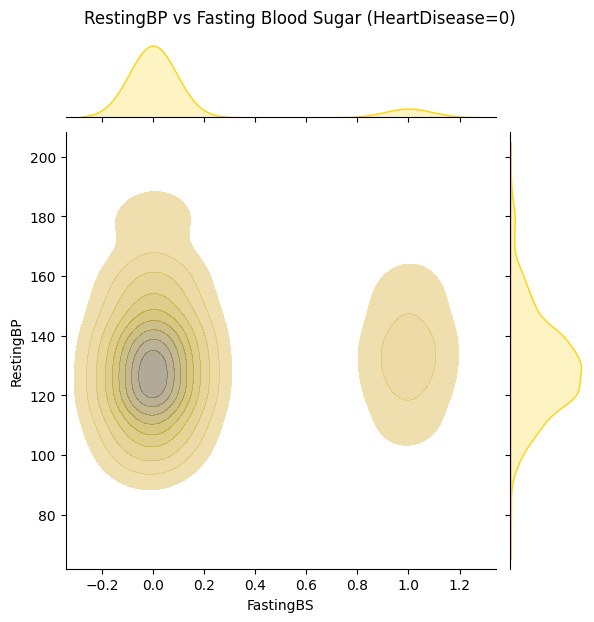

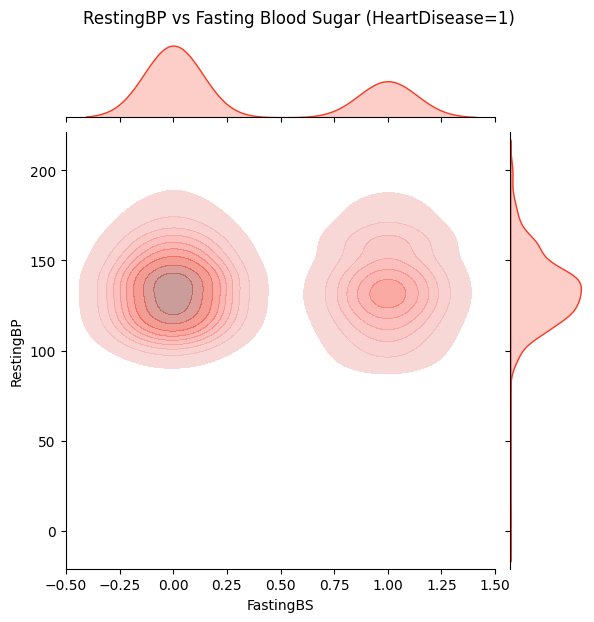

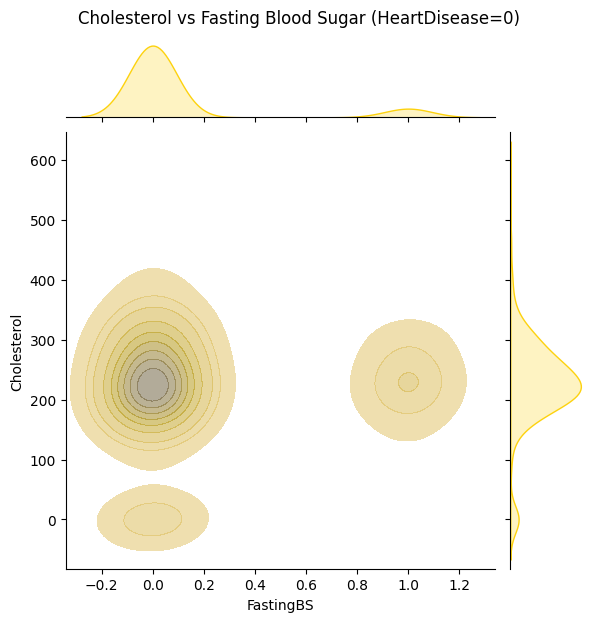

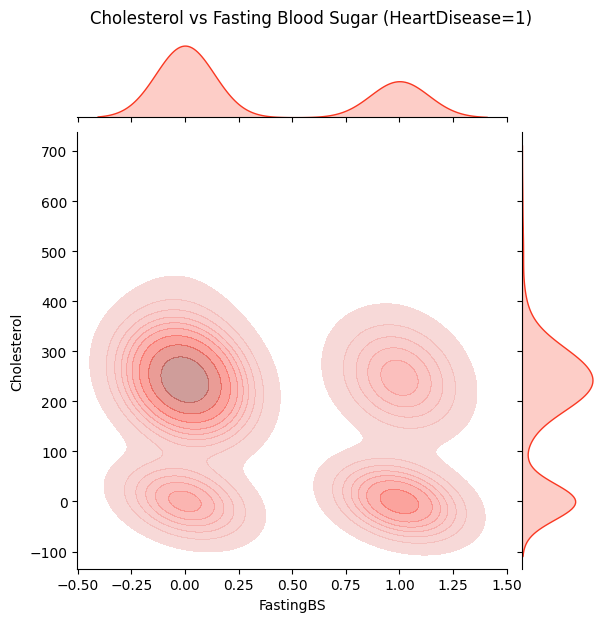

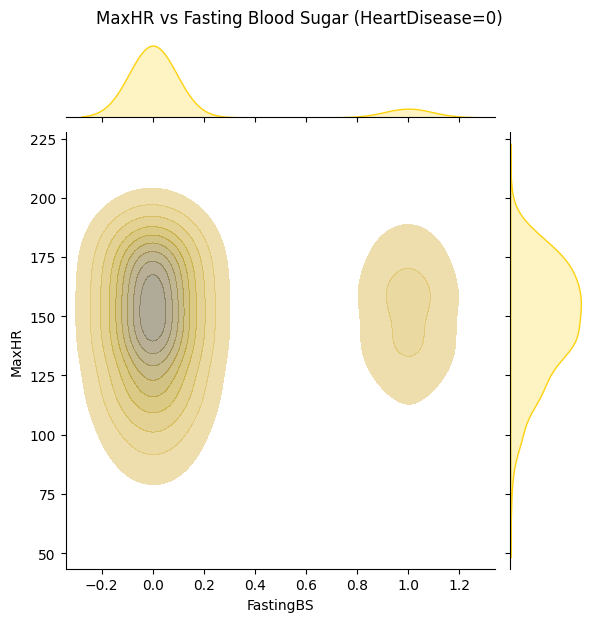

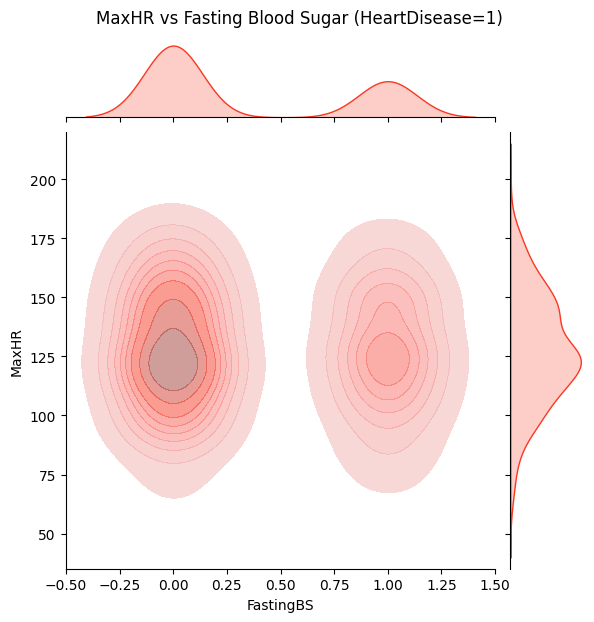

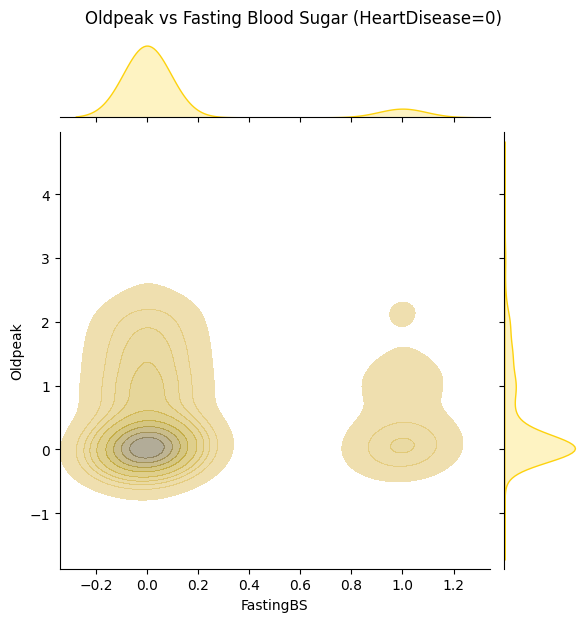

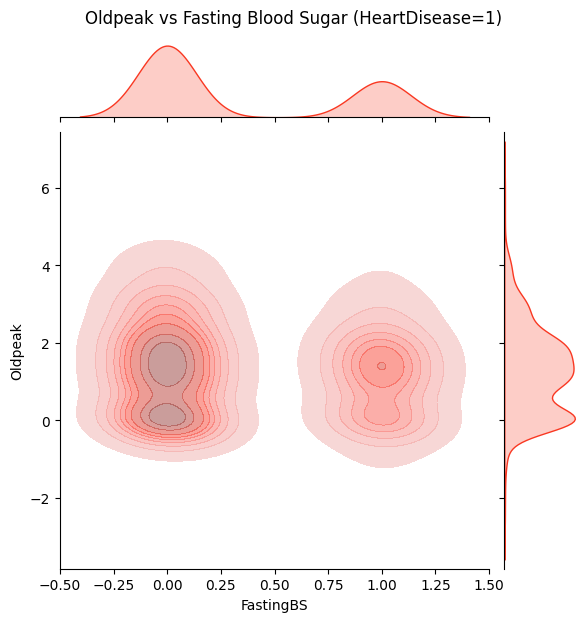

In [37]:

for i in range(3):
    for label, color in zip([0, 1], [colors[1], colors[0]]):
        subset = data[data['HeartDisease'] == label]
        sns.jointplot(
            x='FastingBS',
            y=numerical_features[i],
            data=subset,
            kind='kde',
            fill=True,
            height=6,
            color=color,
            alpha=0.5
        ).fig.suptitle(f"{numerical_features[i]} vs Fasting Blood Sugar (HeartDisease={label})", y=1.03)


for i in [-2, -1]:
    for label, color in zip([0, 1], [colors[1], colors[0]]):
        subset = data[data['HeartDisease'] == label]
        sns.jointplot(
            x='FastingBS',
            y=numerical_features[i],
            data=subset,
            kind='kde',
            fill=True,
            height=6,
            color=color,
            alpha=0.5
        ).fig.suptitle(f"{numerical_features[i]} vs Fasting Blood Sugar (HeartDisease={label})", y=1.03)

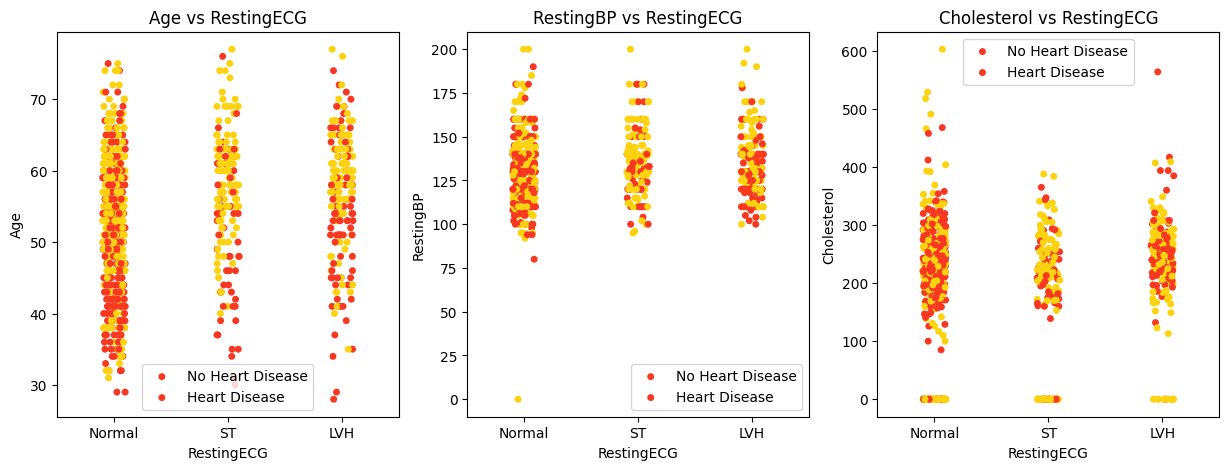

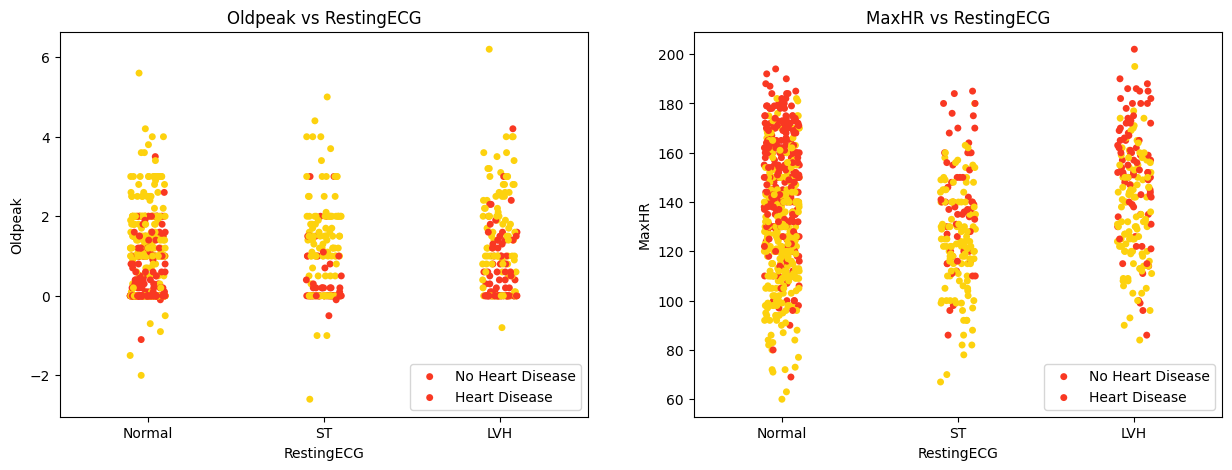

In [38]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'RestingECG',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'RestingECG',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG'
    plt.title(title);

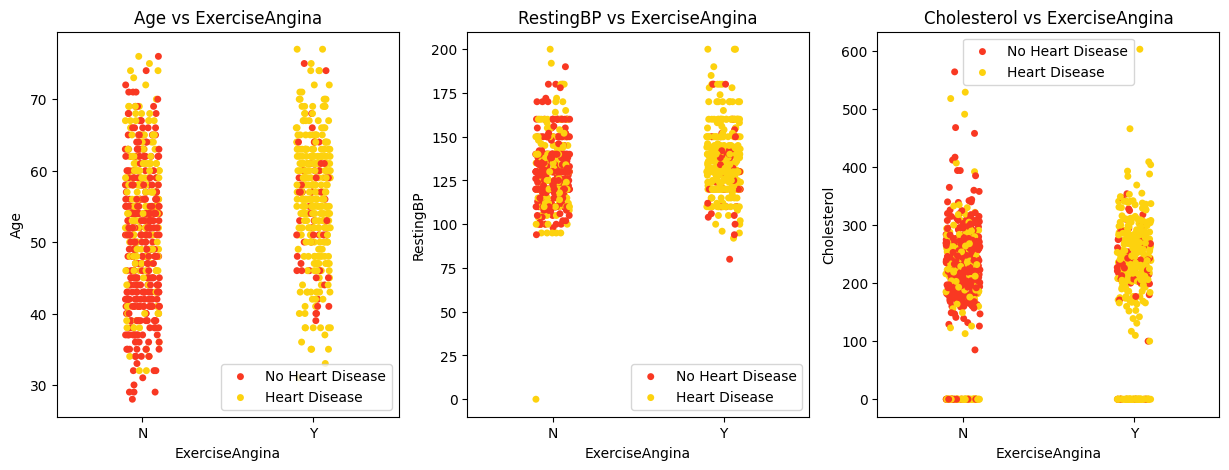

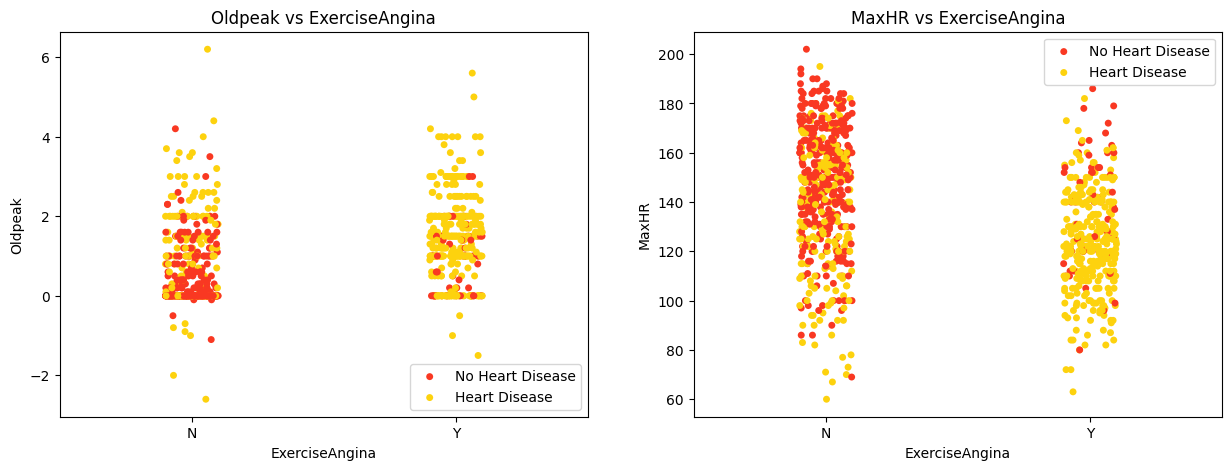

In [39]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title);

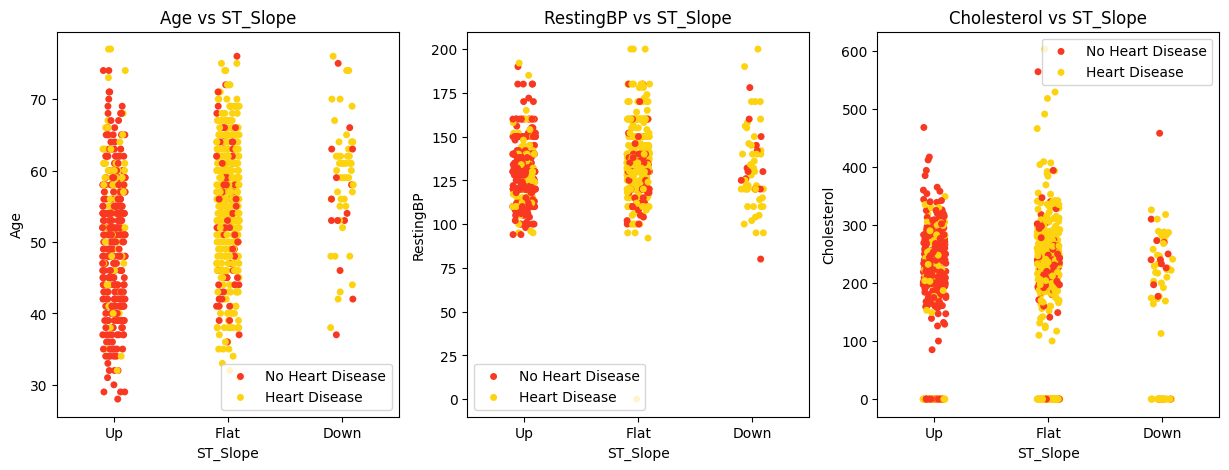

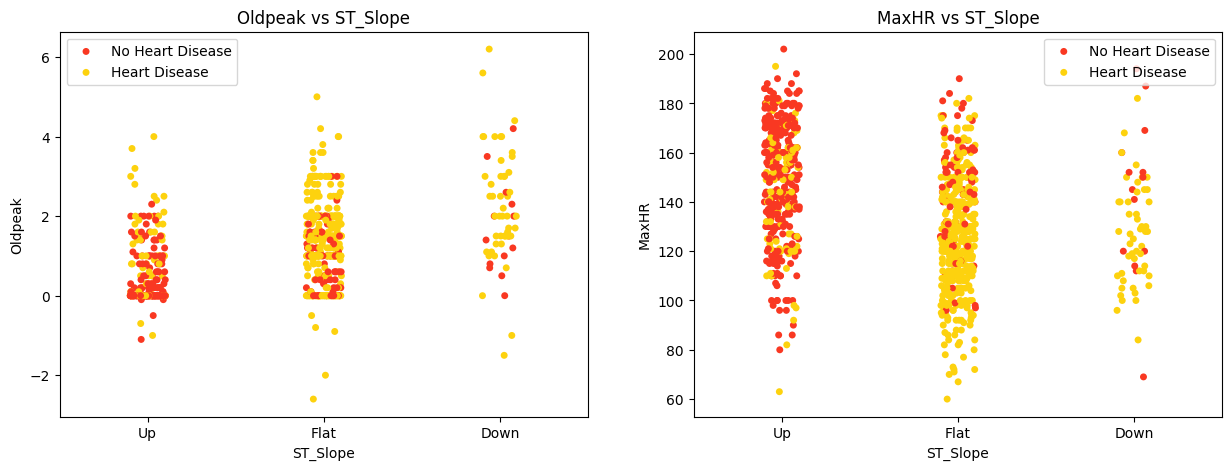

In [40]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope'
    plt.title(title);

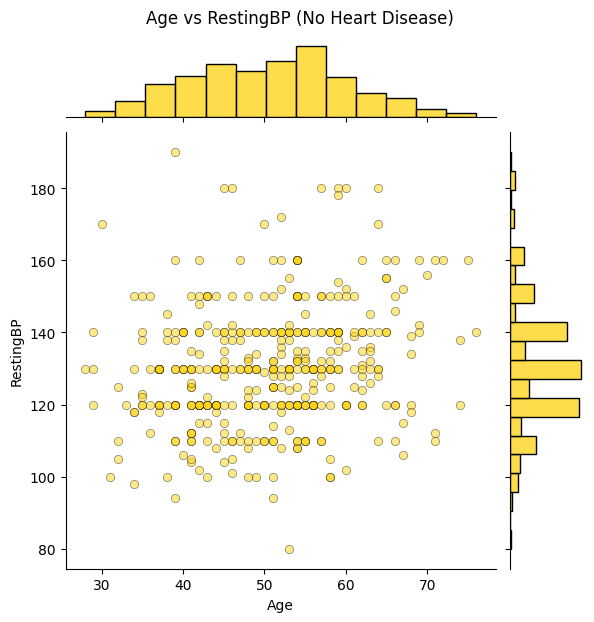

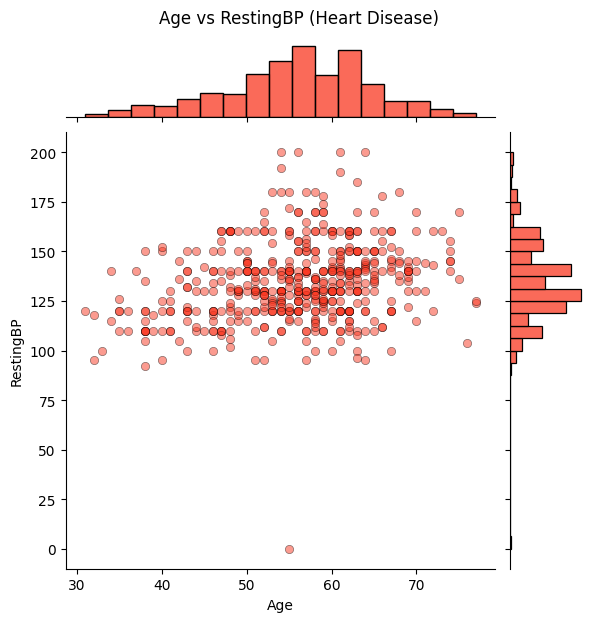

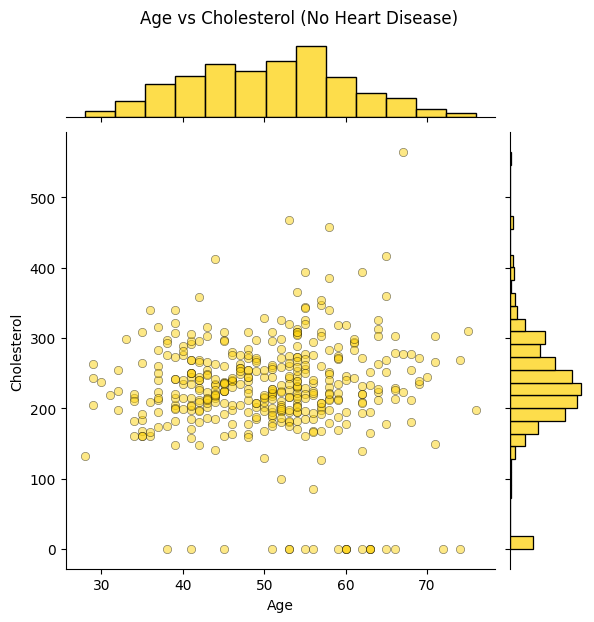

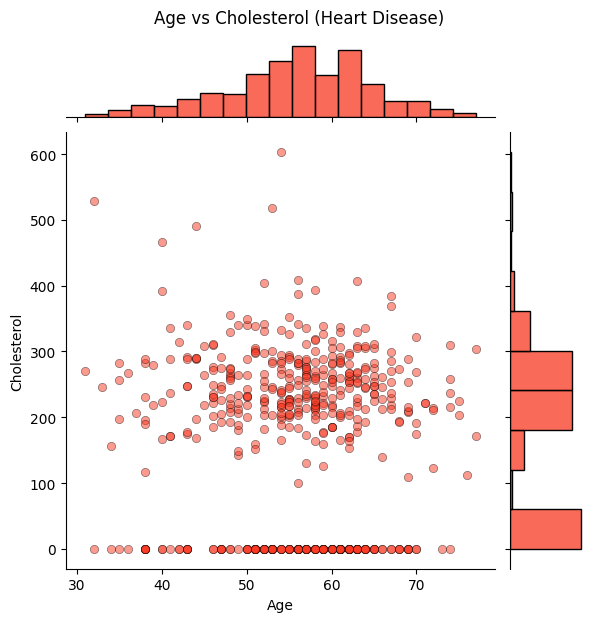

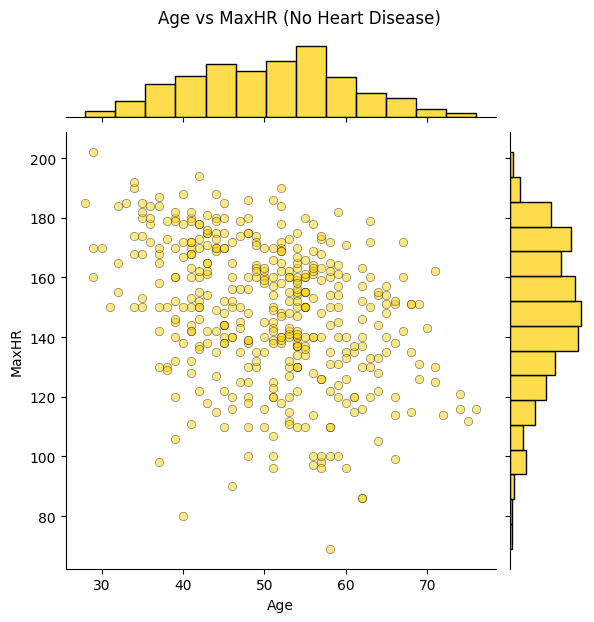

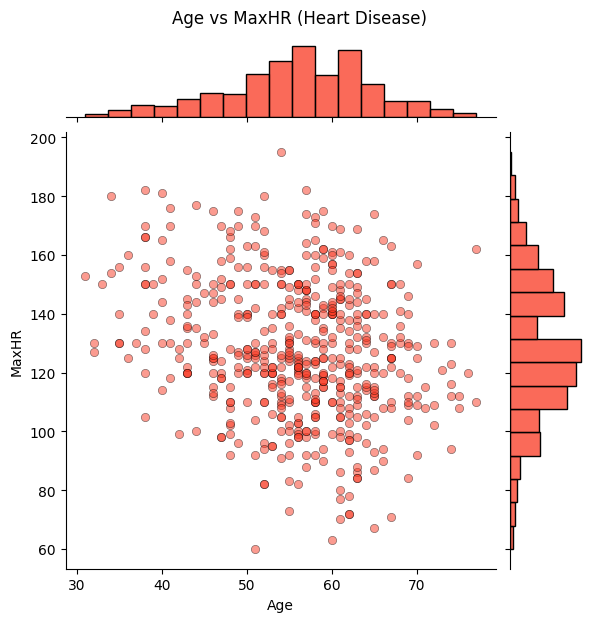

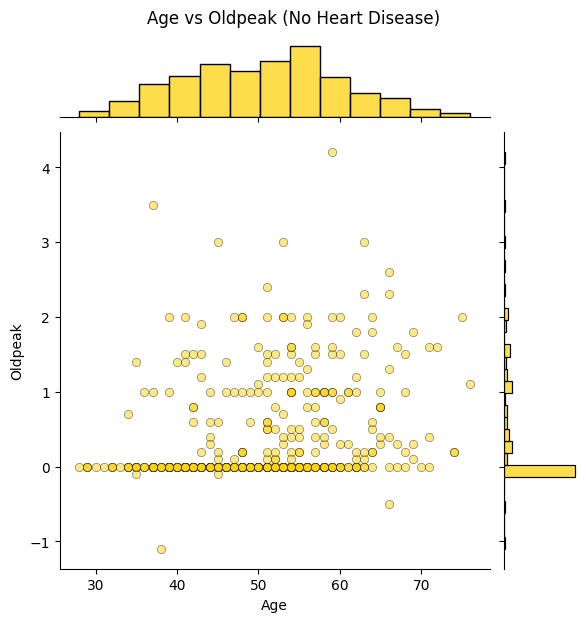

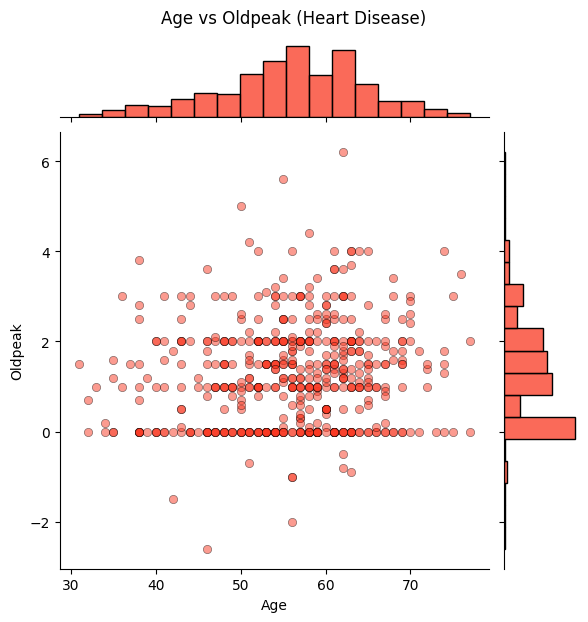

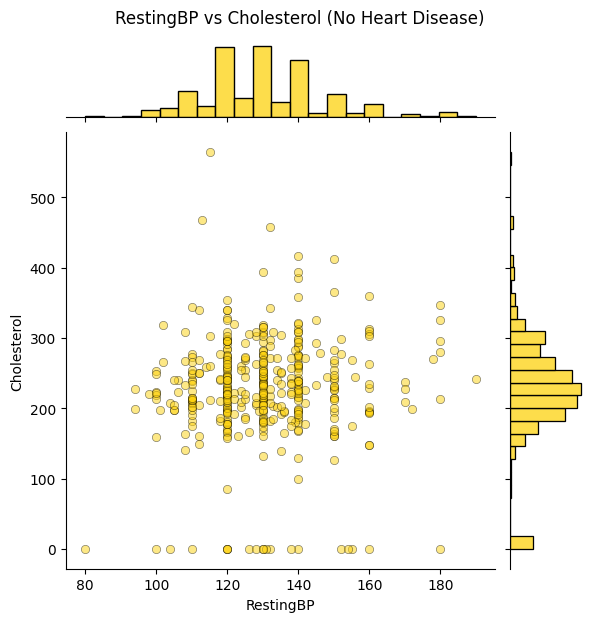

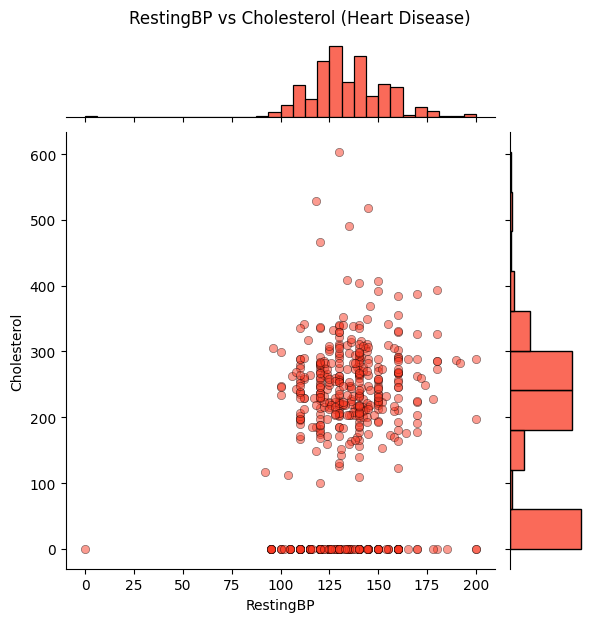

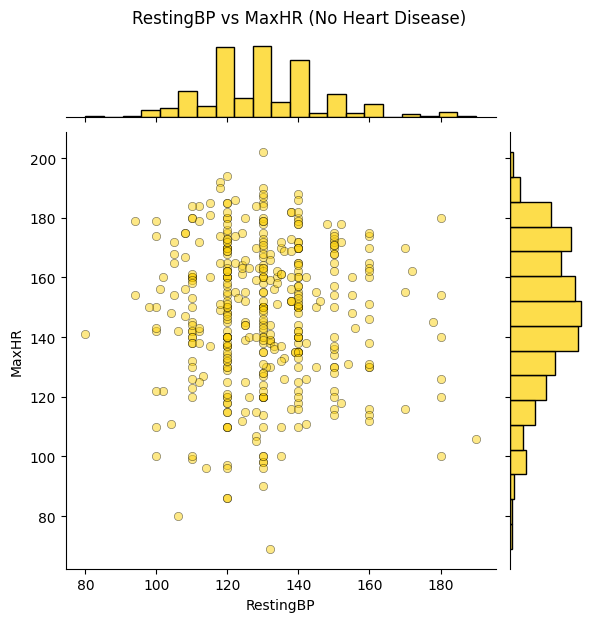

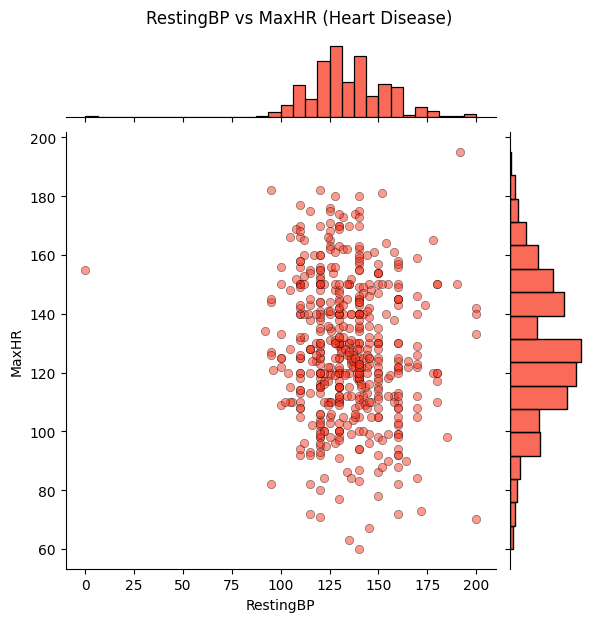

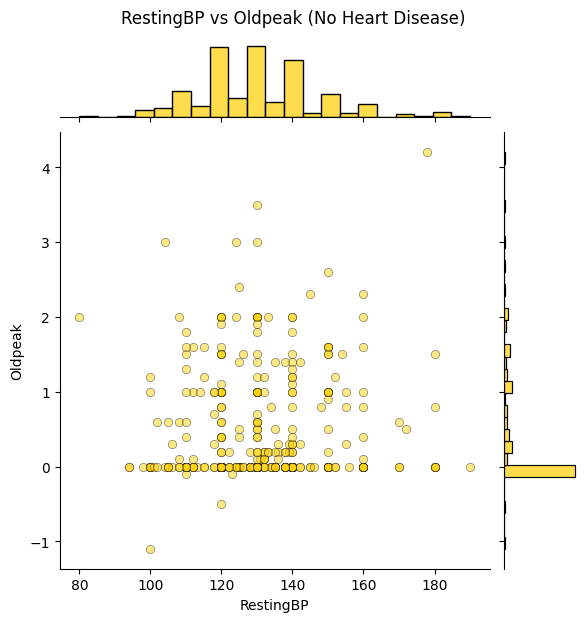

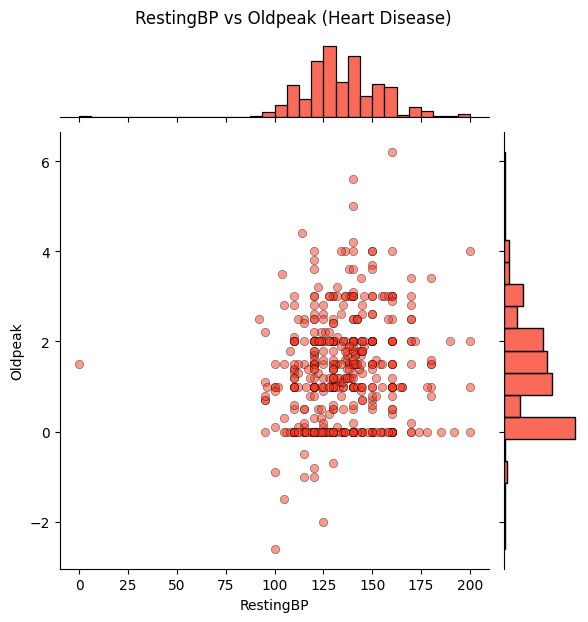

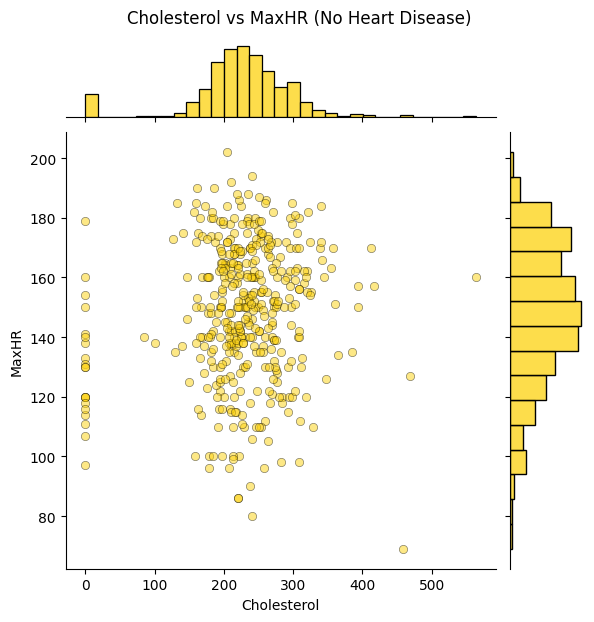

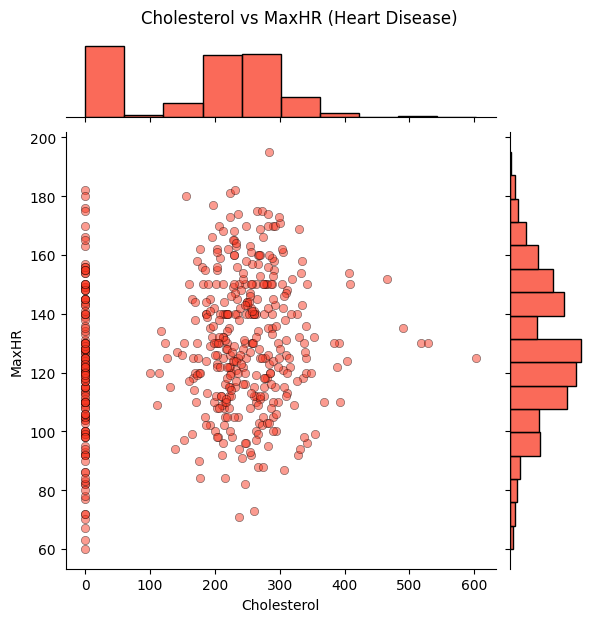

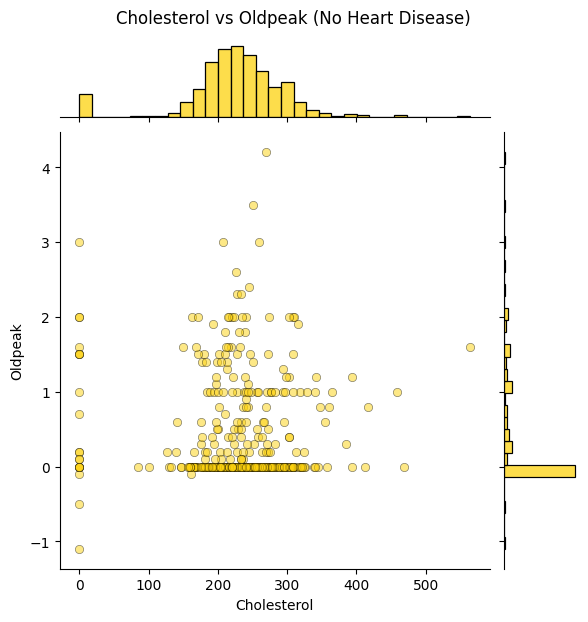

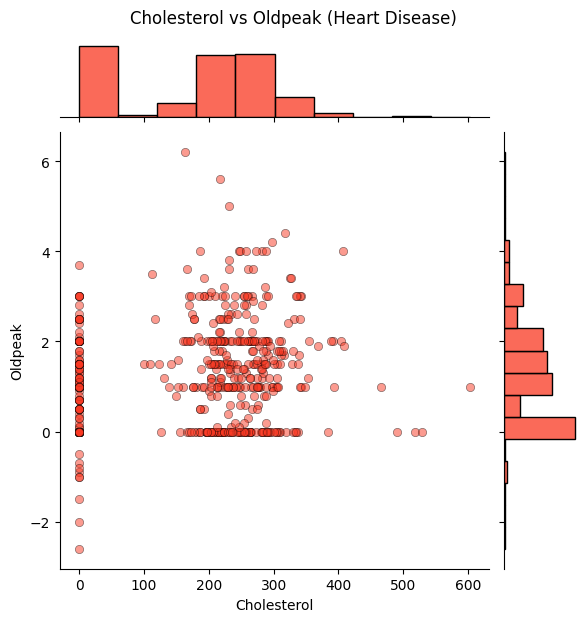

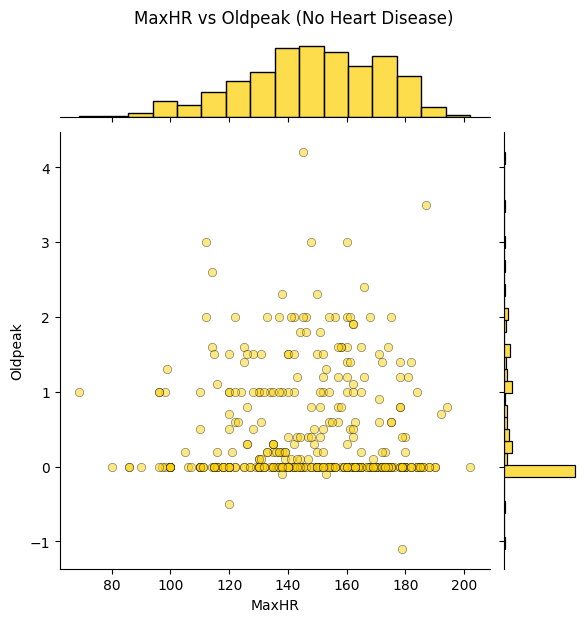

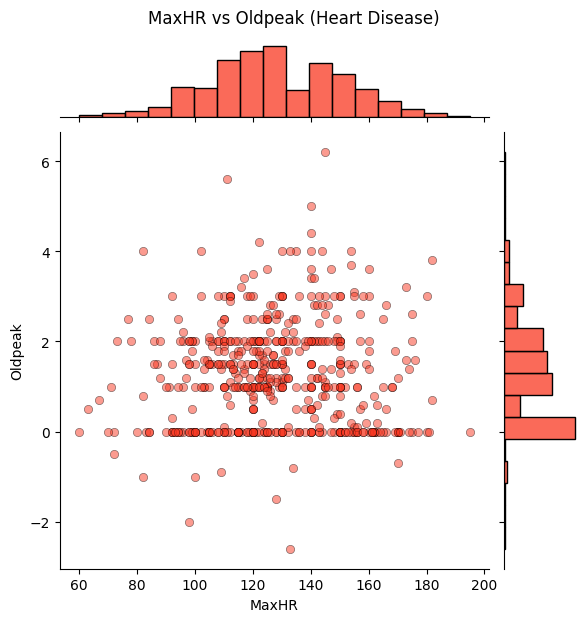

In [41]:
pair_count = 0
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            pair_count += 1
            for label, color, label_text in zip([0, 1], [colors[1], colors[0]], ['No Heart Disease', 'Heart Disease']):
                subset = data[data['HeartDisease'] == label]
                g = sns.jointplot(
                    x=numerical_features[i],
                    y=numerical_features[j],
                    data=subset,
                    kind='scatter',
                    height=6,
                    color=color,
                    edgecolor='black',
                    alpha=0.5
                )
                g.fig.suptitle(f"{numerical_features[i]} vs {numerical_features[j]} ({label_text})", y=1.03)

**Feature Engineering**

In [42]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
df1.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0 -1.43    1              1       0.41         0.83          0           1   
1 -0.48    0              2       1.49        -0.17          0           1   
2 -1.75    1              1      -0.13         0.77          0           2   
3 -0.58    0              0       0.30         0.14          0           1   
4  0.05    1              2       0.95        -0.03          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0   1.38               0     0.30         2             0  
1   0.75               0     0.41         1             1  
2  -1.53               0     0.30         2             0  
3  -1.13               1     0.47         1             1  
4  -0.58               0     0.30         2             0

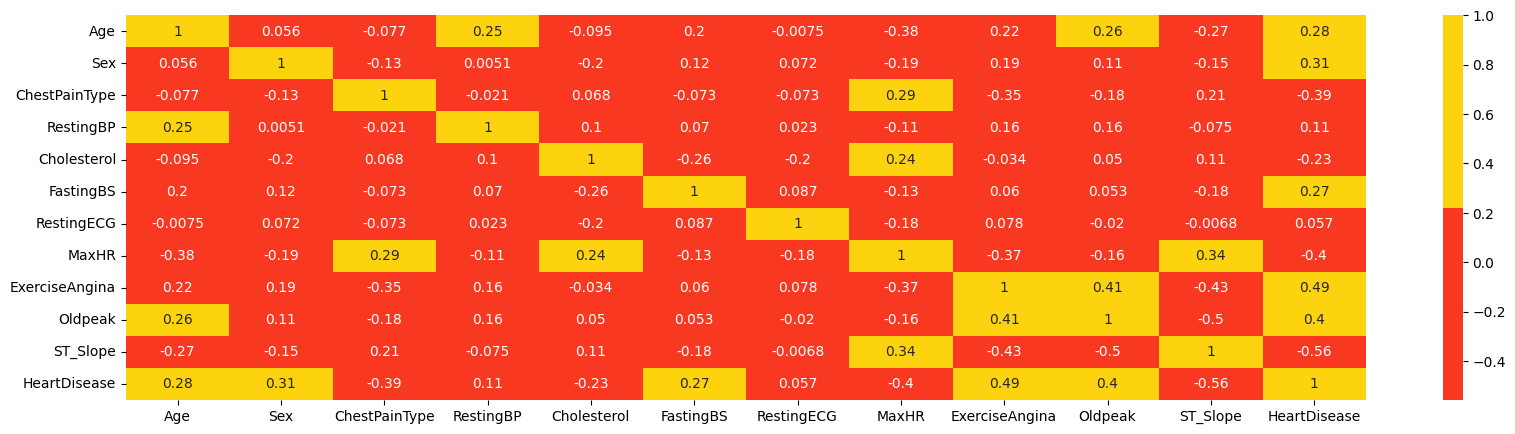

In [43]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = colors,annot = True);

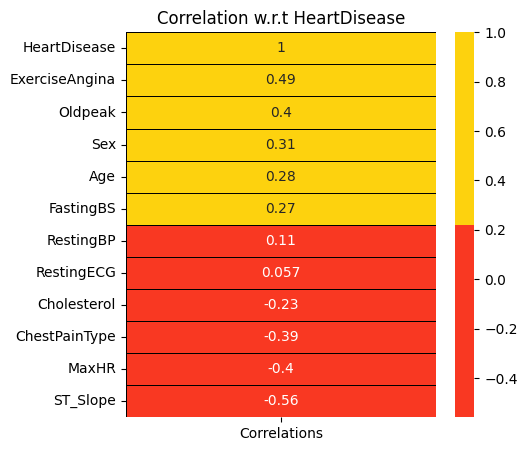

In [44]:
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

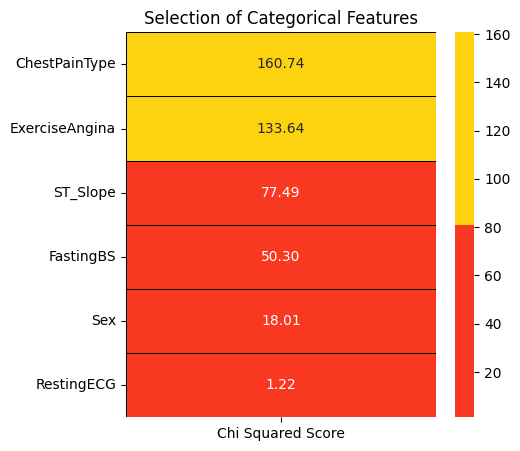

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = df1.loc[:,categorical_features[:-1]]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

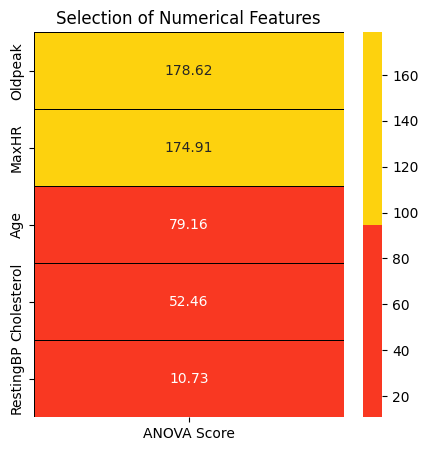

In [46]:
from sklearn.feature_selection import f_classif

features = df1.loc[:,numerical_features]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

**Prediction Modeling**

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [49]:
features = df1[df1.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
target = df1['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

In [50]:
def model(classifier):
    # Fit the model
    classifier.fit(x_train, y_train)

    # Predict
    prediction = classifier.predict(x_test)

    # Cross-validation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    # Metrics
    print("Accuracy :", '{0:.2%}'.format(accuracy_score(y_test, prediction)))
    print("Cross Validation Score :", '{0:.2%}'.format(
        cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score :", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))

    # ROC Curve
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.title('ROC Curve')
    plt.show()

In [53]:
def model_evaluation(classifier):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

Accuracy : 87.50%
Cross Validation Score : 91.11%
ROC_AUC Score : 87.43%


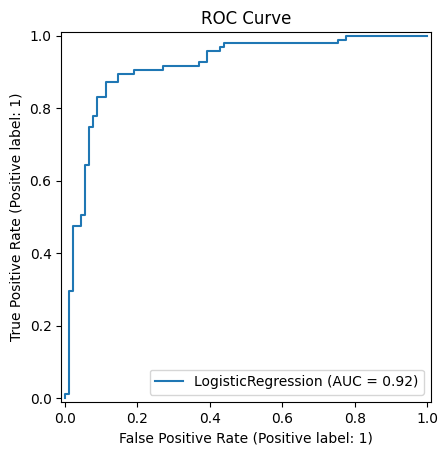

In [51]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2')
model(classifier_lr)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



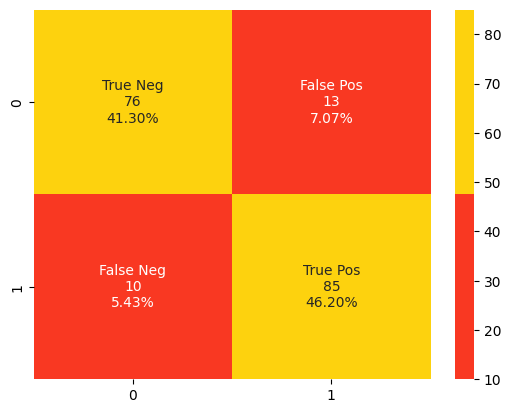

In [54]:
model_evaluation(classifier_lr)

Accuracy : 87.50%
Cross Validation Score : 90.53%
ROC_AUC Score : 87.43%


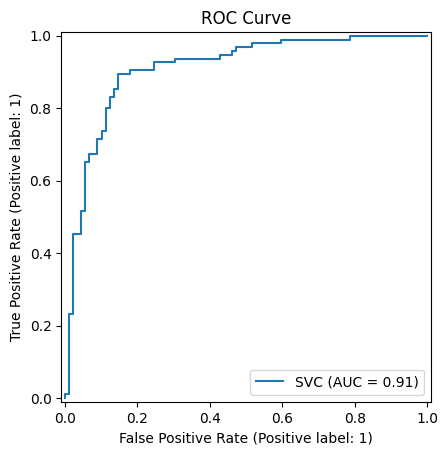

In [55]:
from sklearn.svm import SVC

classifier_svc = SVC(kernel = 'linear',C = 0.1)

model(classifier_svc)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



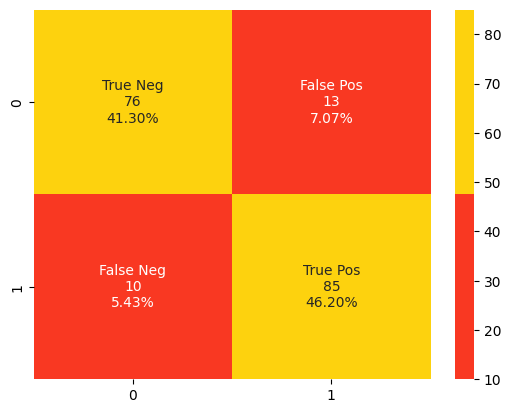

In [56]:
model_evaluation(classifier_svc)

Accuracy : 84.78%
Cross Validation Score : 89.09%
ROC_AUC Score : 84.62%


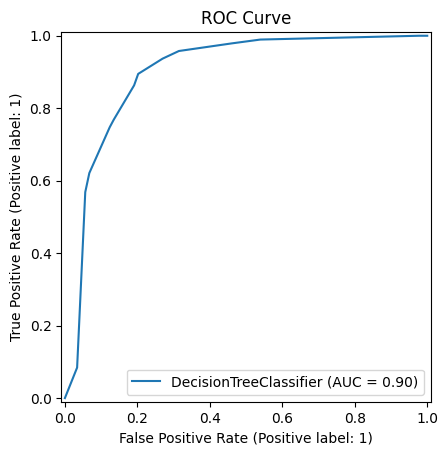

In [57]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

model(classifier_dt)



              precision    recall  f1-score   support

           0       0.88      0.80      0.84        89
           1       0.83      0.89      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



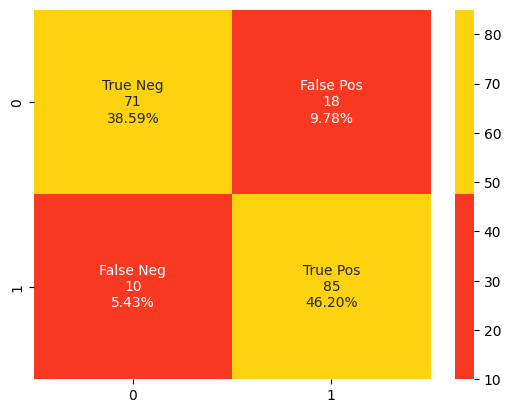

In [58]:
model_evaluation(classifier_dt)

Accuracy : 84.24%
Cross Validation Score : 92.91%
ROC_AUC Score : 84.06%


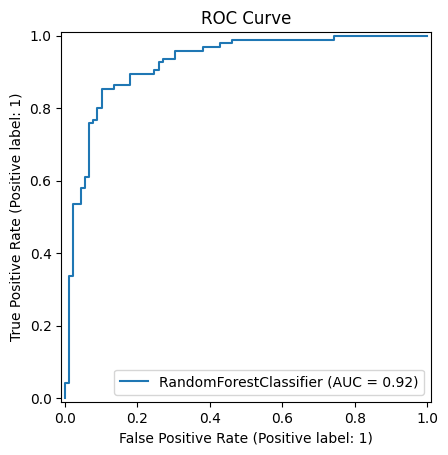

In [59]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

model(classifier_rf)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        89
           1       0.82      0.89      0.85        95

    accuracy                           0.84       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



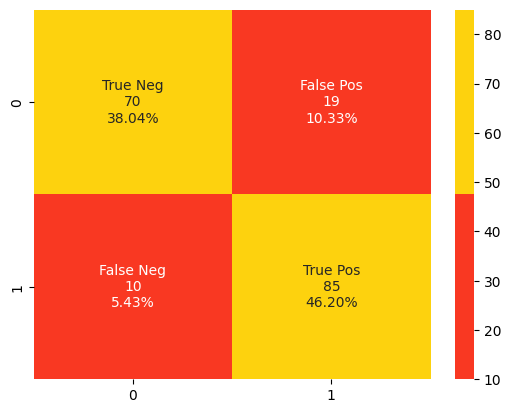

In [60]:
model_evaluation(classifier_rf)

Accuracy : 81.52%
Cross Validation Score : 89.34%
ROC_AUC Score : 81.36%


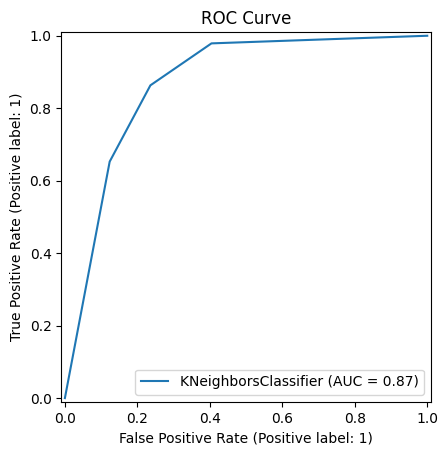

In [61]:
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

model(classifier_knn)

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        89
           1       0.80      0.86      0.83        95

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.81       184



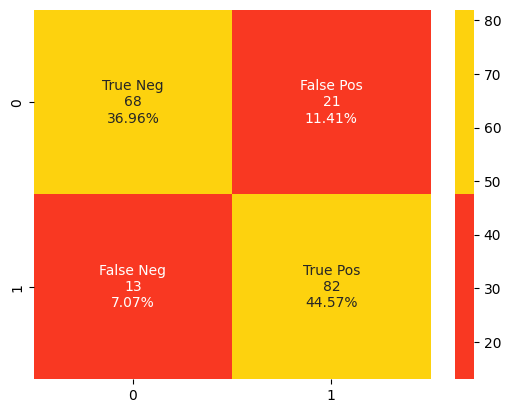

In [62]:
model_evaluation(classifier_knn)